<a href="https://colab.research.google.com/github/MehrdadGh1989/StockPrice-Prediction-with-ML-DL-Models/blob/main/Machine_Learning_Project_Edited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apple Stock Price

In [1]:
from google.colab import files
uploaded = files.upload()


Saving AAPL_1J2021_31J2023.csv to AAPL_1J2021_31J2023 (3).csv
Saving AAPL_1Jan2009-10Feb2023.csv to AAPL_1Jan2009-10Feb2023 (3).csv
Saving AAPL_5.csv to AAPL_5 (3).csv
Saving AAPL_2010_2022.csv to AAPL_2010_2022 (3).csv
Saving AAPL_2010_2023_3.csv to AAPL_2010_2023_3 (3).csv
Saving AAPL_2010_2023_4.csv to AAPL_2010_2023_4 (3).csv
Saving AAPL_2015_2019.csv to AAPL_2015_2019 (3).csv
Saving AAPL_2016_2023_2.csv to AAPL_2016_2023_2 (3).csv
Saving AAPL_2020_2023.csv to AAPL_2020_2023 (3).csv
Saving AAPL_2020_2023_3.csv to AAPL_2020_2023_3 (3).csv
Saving AAPL_2023_3_2023_4.csv to AAPL_2023_3_2023_4 (3).csv
Saving AAPLE_WEEK.csv to AAPLE_WEEK (3).csv
Saving All_Data.csv to All_Data (3).csv
Saving Apple 21-23.csv to Apple 21-23 (3).csv
Saving Apple 22_23.csv to Apple 22_23 (3).csv


In [5]:
# ==============================
# 🔹 Basic Libraries
# ==============================
import os
import time
import math
import warnings
import numpy as np
import pandas as pd
import statistics
from itertools import cycle
from datetime import datetime
import datetime as dt

warnings.filterwarnings("ignore")

# ==============================
# 🔹 Visualization Libraries
# ==============================
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import plot

plt.style.use('seaborn-v0_8')
%matplotlib inline

# ==============================
# 🔹 Scipy & Statistics
# ==============================
from scipy import stats, signal
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
from statsmodels.stats.stattools import durbin_watson


# ==============================
# 🔹 Machine Learning (Sklearn)
# ==============================
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    explained_variance_score,
    mean_poisson_deviance,
    mean_gamma_deviance,
    accuracy_score
)

# ==============================
# 🔹 XGBoost
# ==============================
import xgboost as xgb

# ==============================
# 🔹 Deep Learning (TensorFlow / Keras)
# ==============================
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Dropout
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator




In [3]:
! pip install pmdarima


In [191]:
!pip install arch
from arch import arch_model

In [295]:
!pip install mne
from mne.time_frequency import psd_array_multitaper

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 29.8 MB/s eta 0:00:00


In [296]:
!pip install TensorFlow

In [297]:
!pip install xgboost

In [6]:
#Define Seed to fix the results in different Runs
np.random.seed(1234)
tf.random.set_seed(1234)

In [7]:
Apple_Data1=pd.read_csv('AAPL_2010_2022.csv', header=0, index_col=0, parse_dates=True)
Apple_Data1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515212,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526478,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422663,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410792,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453411,447610800
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.860001,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,130.029999,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,126.040001,85438400


In [8]:
Apple_Data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3272 entries, 2010-01-04 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3272 non-null   float64
 1   High       3272 non-null   float64
 2   Low        3272 non-null   float64
 3   Close      3272 non-null   float64
 4   Adj Close  3272 non-null   float64
 5   Volume     3272 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 178.9 KB


### Data Discription
Date : Date of trading,

Open : Price at which security first trades,

High : Highest Price of the trading day,

Low : Lowest Price of the trading day,

Close : Last Price the stock traded during the trading day,

Adj Close : Price that is  adjusted Coroporate Actions on Closing Price,

Volume : Number of Shares that changed hands during the trading day.

Note: Adjusted Close is often used when examining historical returns or doing a detailed analysis of past performance.


In [9]:
Apple_Data1_M1=Apple_Data1[['Adj Close','Volume']].copy()
Apple_Data1_M1['Year'] = Apple_Data1_M1.index.year
Apple_Data1_M1['Month'] = Apple_Data1_M1.index.strftime('%B')
#Apple_Data1_M1['Day'] = Apple_Data1_M1.index.strftime('%A')
Apple_Data1_M1['Quarter'] = Apple_Data1_M1.index.quarter


In [10]:
Apple_Data1_M1

,Adj Close,Volume,Year,Month,Quarter
Date,,,,,
2010-01-04,6.515212,493729600,2010,January,1
2010-01-05,6.526478,601904800,2010,January,1
2010-01-06,6.422663,552160000,2010,January,1
2010-01-07,6.410792,477131200,2010,January,1
2010-01-08,6.453411,447610800,2010,January,1
...,...,...,...,...,...
2022-12-23,131.860001,63814900,2022,December,4
2022-12-27,130.029999,69007800,2022,December,4
2022-12-28,126.040001,85438400,2022,December,4


# Data Visualization and Exploration

### The Change of Apple Stock Price in Different Years

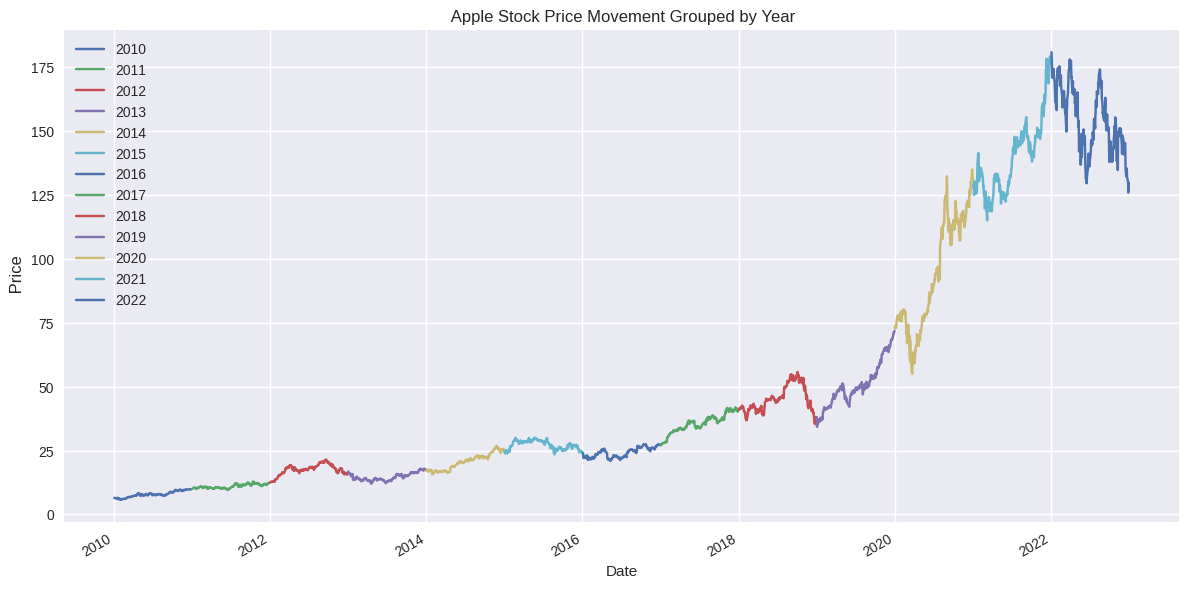

In [11]:
#Apple Stock Price Change Over The Time
list1=['Year']
Column_list = ['Adj Close']
fig, ax = plt.subplots(len(list1), figsize = (12, 6))
Apple_Data1_M1.groupby('Year')['Adj Close'].plot(ax = ax, legend = True)
ax.set_title(" Apple Stock Price Movement Grouped by Year", fontsize = 12)
ax.set_ylabel( " " + "Price", fontsize = 12)
fig.tight_layout(pad = 1.1)
ax.yaxis.grid(True)

### Feauture Selection

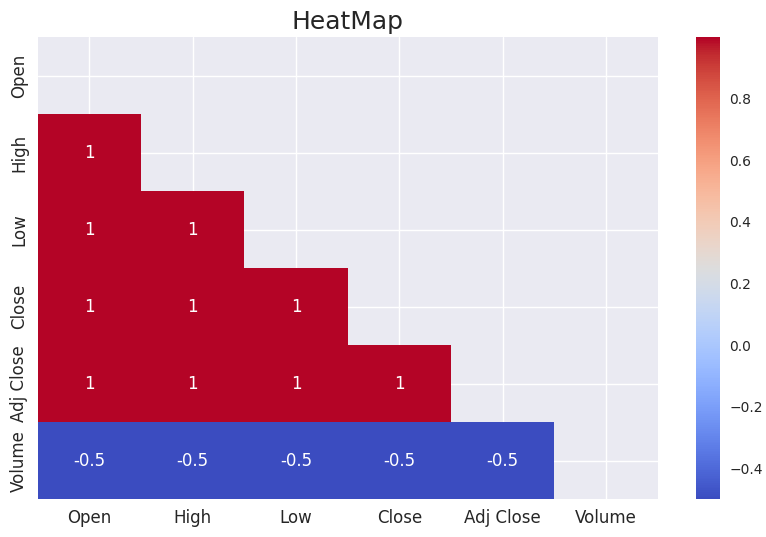

In [12]:
##HeatMap
fig = plt.figure(figsize=(10,6))
matrix = np.triu(Apple_Data1.corr())
ax = sns.heatmap(Apple_Data1.corr(),annot=True,annot_kws={"size":12},mask=matrix,cmap='coolwarm')
ax.tick_params(labelsize=12)
sns.set(font_scale=1.5)
ax.set_title('HeatMap')
plt.style.use('fivethirtyeight')
plt.show()

### The Percentage of Volume of Stock PriceTraded among Different Years from 2010 to 2022
The Minimum Volume of Apple Stocks traded  in 2022, And Maximum in 2010

In [13]:
#Volume Over The Years
fig = px.pie(values=Apple_Data1_M1.groupby('Year').sum()['Volume'].sort_values().values, names=Apple_Data1_M1.groupby('Year').sum()['Volume'].sort_values().index, color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

###  Average Price of Apple Stock in Different Times (Year, Month (in Average), Quarter (in Average))

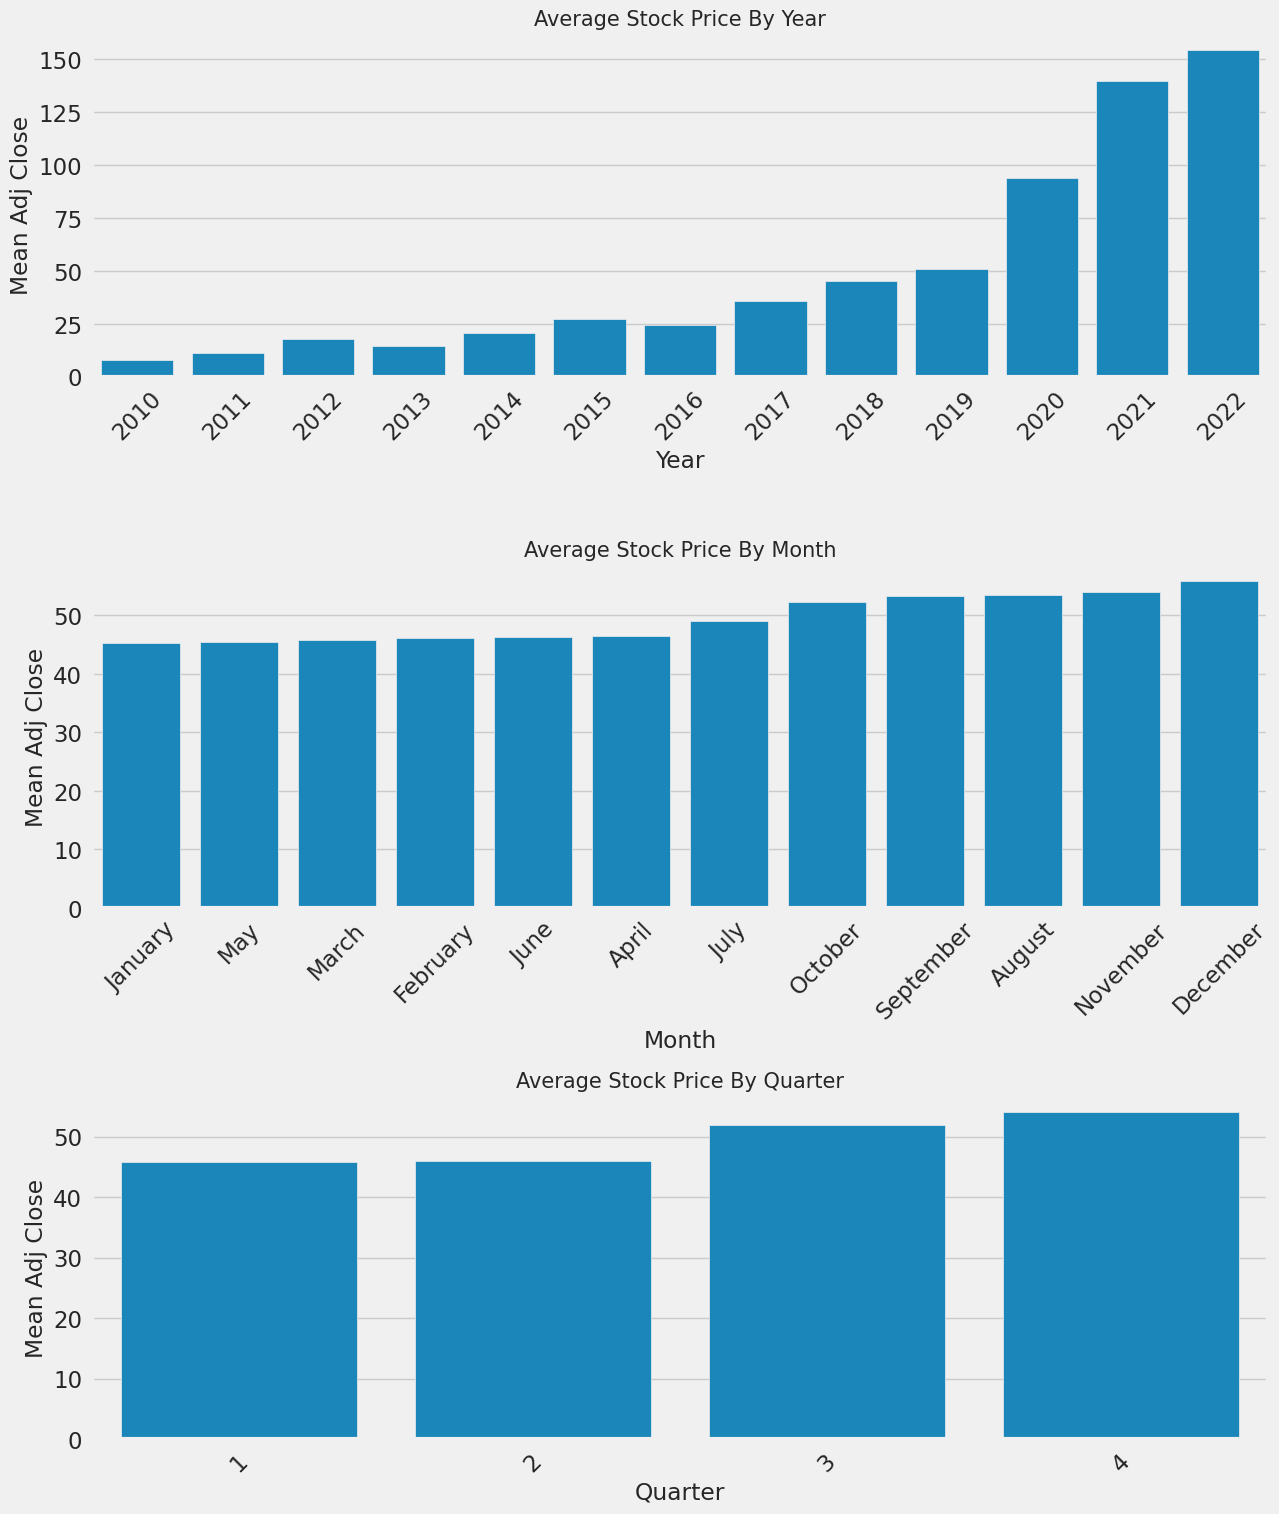

In [14]:
#Average of Adj Close over Different Parameters
fig = plt.figure(figsize=(10,16))
fig.set_size_inches(13,20)
group_cols = Apple_Data1_M1.columns

for enum,i in enumerate(group_cols[2:]):
  ax = fig.add_subplot(4,1,enum+1)
  Aggregated = pd.DataFrame(Apple_Data1_M1.groupby(str(i))["Adj Close"].mean()).reset_index().sort_values('Adj Close')
  sns.barplot(data=Aggregated,x=str(i),y="Adj Close",ax=ax)
  ax.set(xlabel=str(i), ylabel='Mean Adj Close')
  ax.set_title("Average Stock Price By {}".format(str(i)),fontsize=15)
  plt.xticks(rotation=45)
plt.tight_layout(pad=1)



### Box Plot & Adj Close (Apple Stock Price) in Different Years
In General, A boxplot is a standardized way of displaying the distribution of data based on a five number:

(“minimum”, first quartile = 25%, median = 50%, third quartile = 75% and “maximum”)

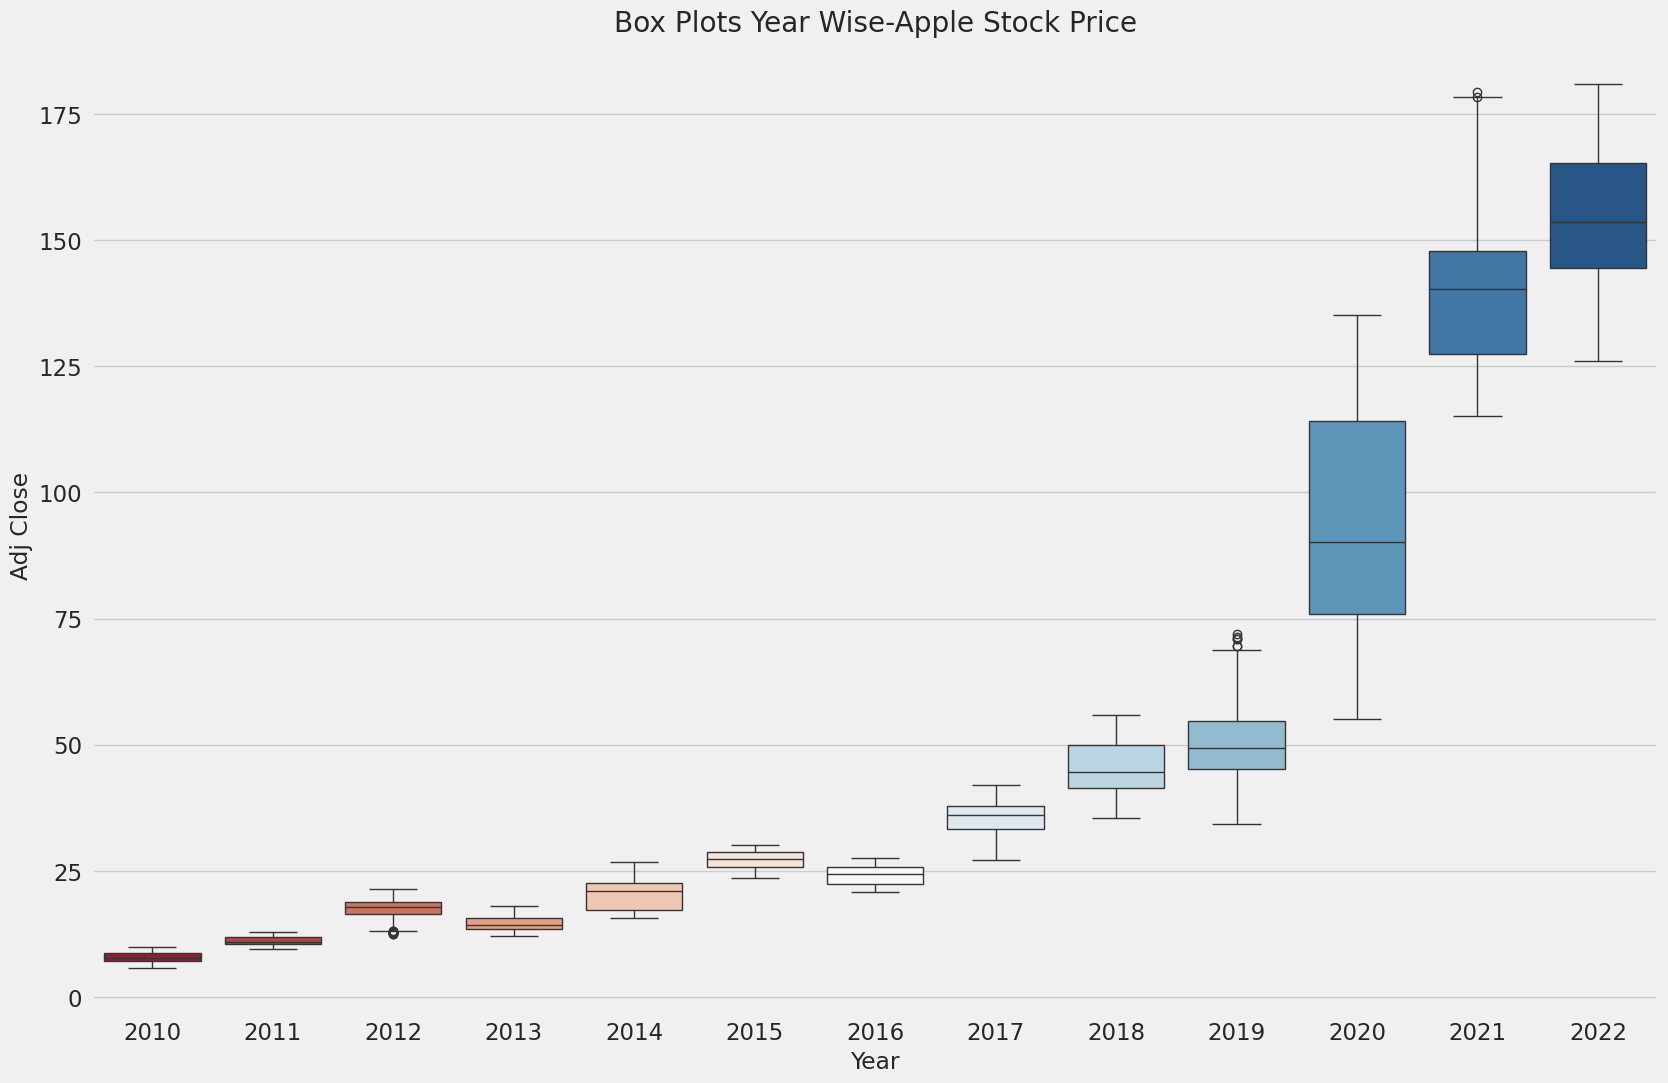

In [15]:
#To Show The Changes over the Year, first, I should add a column with the name of the year to my Dataframe
#Yearly Show
plt.figure(figsize=(18,12))
ax = sns.boxplot(x=Apple_Data1_M1['Year'],y=Apple_Data1_M1['Adj Close'],palette='RdBu')
ax.set_title('Box Plots Year Wise-Apple Stock Price')
plt.style.context('fivethirtyeight');


### Comparison The Average Price of Apple Stock In different Months From 2010 to 2022
By Defult Seaborn Calculate the Mean in Each Category

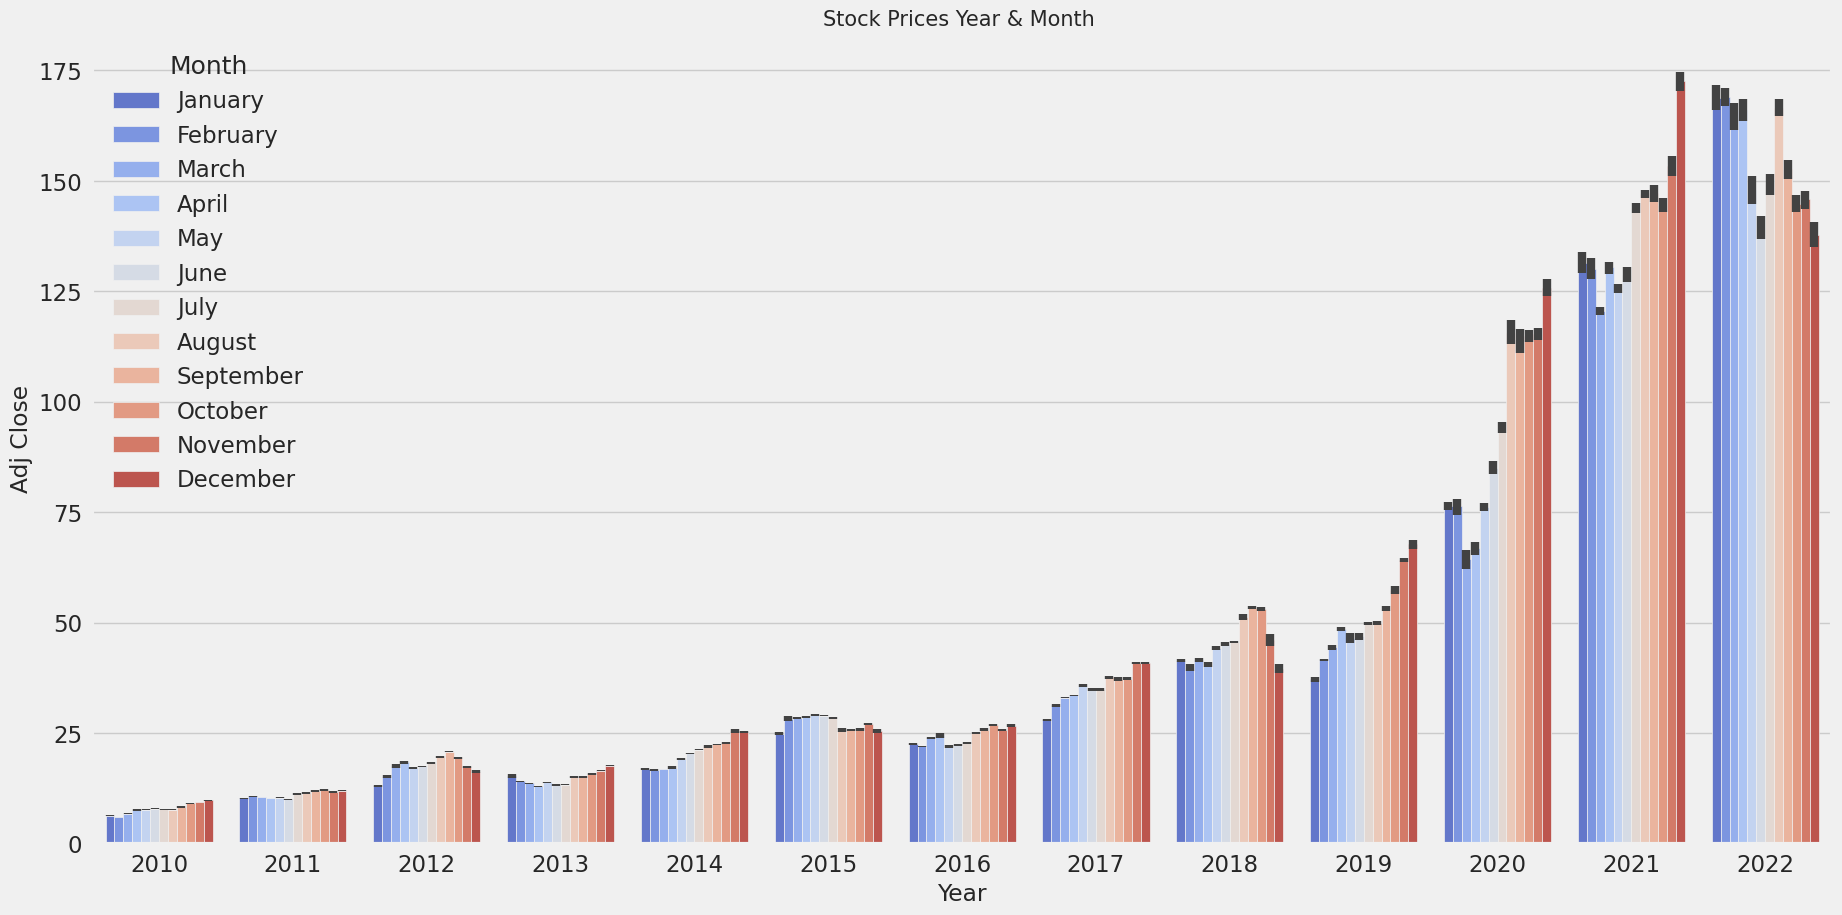

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
BarChart = sns.barplot(x="Year", y="Adj Close", hue='Month', palette="coolwarm", data=Apple_Data1_M1)
BarChart.set_title("Stock Prices Year & Month ", fontsize=15)
plt.show()

# Applying Different ML and DL Models to Predict the Stock Price

## Model 1- Support Vector Regression

In [17]:
Apple_Data_M=pd.read_csv('AAPL_2020_2023_3.csv', header=0, index_col=0, parse_dates=True)

In [18]:
Apple_Data_M

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.449409,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.735321,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.314888,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.970093,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.143890,132079200
...,...,...,...,...,...,...
2023-03-24,158.860001,160.339996,157.850006,160.250000,160.250000,59196500
2023-03-27,159.940002,160.770004,157.869995,158.279999,158.279999,52390300
2023-03-28,157.970001,158.490005,155.979996,157.649994,157.649994,45992200


In [19]:
# Reset Index
Apple_Data_M.reset_index(inplace=True)
Apple_Data_M

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.449409,135480400
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.735321,146322800
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.314888,118387200
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.970093,108872000
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,74.143890,132079200
...,...,...,...,...,...,...,...
812,2023-03-24,158.860001,160.339996,157.850006,160.250000,160.250000,59196500
813,2023-03-27,159.940002,160.770004,157.869995,158.279999,158.279999,52390300
814,2023-03-28,157.970001,158.490005,155.979996,157.649994,157.649994,45992200
815,2023-03-29,159.369995,161.050003,159.350006,160.770004,160.770004,51305700


In [20]:
Apple_Data_AdjC_SVR=Apple_Data_M[['Date','Adj Close']]


### Normalizing

In [21]:
# Normalize Data
Apple_Data_AdjC_N_SVR = Apple_Data_AdjC_SVR.copy()
del Apple_Data_AdjC_N_SVR['Date']
scaler=MinMaxScaler(feature_range=(0,1))
Apple_Data_AdjC_N_SVR=scaler.fit_transform(np.array(Apple_Data_AdjC_N_SVR).reshape(-1,1))
print(Apple_Data_AdjC_N_SVR.shape)

(817, 1)


In [22]:
training_size_SVR=int(len( Apple_Data_AdjC_N_SVR)*0.75)
test_size_SVR=len( Apple_Data_AdjC_N_SVR)-training_size_SVR
train_data_SVR,test_data_SVR= Apple_Data_AdjC_N_SVR[0:training_size_SVR,:], Apple_Data_AdjC_N_SVR[training_size_SVR:len( Apple_Data_AdjC_N_SVR),:1]
print("train_data_SVR: ", train_data_SVR.shape)
print("test_data_SVR: ", test_data_SVR.shape)

train_data_SVR:  (612, 1)
test_data_SVR:  (205, 1)


### Create new dataset according to requirement of time-series prediction

In [23]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [24]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 15
X_train_SVR, y_train_SVR = create_dataset(train_data_SVR, time_step)
X_test_SVR, y_test_SVR = create_dataset(test_data_SVR, time_step)

print("X_train_SVR: ", X_train_SVR.shape)
print("y_train_SVR: ", y_train_SVR.shape)
print("X_test_SVR: ", X_test_SVR.shape)
print("y_test_SVR", y_test_SVR.shape)


X_train_SVR:  (596, 15)
y_train_SVR:  (596,)
X_test_SVR:  (189, 15)
y_test_SVR (189,)


### SVR

In [25]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.01, coef0=1)
svr_rbf.fit(X_train_SVR, y_train_SVR)

SVR(C=100, coef0=1, epsilon=0.01, gamma='auto', kernel='poly')

In [26]:
# Lets Do the prediction
train_predict_SVR=svr_rbf.predict(X_train_SVR)
test_predict_SVR=svr_rbf.predict(X_test_SVR)

train_predict_SVR = train_predict_SVR.reshape(-1,1)
test_predict_SVR = test_predict_SVR.reshape(-1,1)

print("Train data prediction:", train_predict_SVR.shape)
print("Test data prediction:", test_predict_SVR.shape)

Train data prediction: (596, 1)
Test data prediction: (189, 1)


In [27]:
# Transform back to original form
train_predict_SVR = scaler.inverse_transform(train_predict_SVR)
test_predict_SVR = scaler.inverse_transform(test_predict_SVR)
original_ytrain_SVR = scaler.inverse_transform(y_train_SVR.reshape(-1,1))
original_ytest_SVR = scaler.inverse_transform(y_test_SVR.reshape(-1,1))

### Plotting Predicted & Real Values in Train and Test Section of DataSet

In [28]:
# shift train predictions for plotting
look_back=time_step
trainPredictPlot_SVR = np.empty_like(Apple_Data_AdjC_N_SVR)
trainPredictPlot_SVR[:, :] = np.nan
trainPredictPlot_SVR[look_back:len(train_predict_SVR)+look_back] = train_predict_SVR
print("Train predicted data: ", trainPredictPlot_SVR.shape)
#trainPredictPlot_SVR

Train predicted data:  (817, 1)


In [29]:
# shift test predictions for plotting
testPredictPlot_SVR = np.empty_like(Apple_Data_AdjC_N_SVR)
testPredictPlot_SVR[:, :] = np.nan
testPredictPlot_SVR[len(train_predict_SVR)+(look_back*2)+1:len(Apple_Data_AdjC_N_SVR)-1, :] = test_predict_SVR
print("Test predicted data: ", testPredictPlot_SVR.shape)


Test predicted data:  (817, 1)


In [30]:
names = cycle(['Original close price','Train predicted Adj Close price','Test predicted Adj Close price'])

plotdf_SVR = pd.DataFrame({
    'date': Apple_Data_AdjC_SVR['Date'],
    'original_Adj_Close': Apple_Data_AdjC_SVR['Adj Close'],
    'train_predicted_Adj_Close': trainPredictPlot_SVR.reshape(1,-1)[0].tolist(),
    'test_predicted_Adj_Close': testPredictPlot_SVR.reshape(1,-1)[0].tolist()
})

fig = px.line(
    plotdf_SVR,
    x='date',
    y=['original_Adj_Close','train_predicted_Adj_Close','test_predicted_Adj_Close'],
    labels={'value':'Apple Stock Price','date': 'Date'}
)

fig.update_layout(
    title_text='Real & Predicted Value of Stock Price',
    plot_bgcolor='white',
    font_size=12,
    font_color='black',
    legend_title_text='Adj Close Price',
    width=960,     # 10 inches
    height=576     # 6 inches
)

fig.for_each_trace(lambda t: t.update(name=next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()


### Investigation of the Model

In [31]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain_SVR,train_predict_SVR)))
print("Train data MSE: ", mean_squared_error(original_ytrain_SVR,train_predict_SVR))
print("Train data MAE: ", mean_absolute_error(original_ytrain_SVR,train_predict_SVR))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest_SVR,test_predict_SVR)))
print("Test data MSE: ", mean_squared_error(original_ytest_SVR,test_predict_SVR))
print("Test data MAE: ", mean_absolute_error(original_ytest_SVR,test_predict_SVR))

Train data RMSE:  2.538610065388405
Train data MSE:  6.444541064091323
Train data MAE:  1.8897616131923967
-------------------------------------------------------------------------------------
Test data RMSE:  3.0280596801552906
Test data MSE:  9.16914542658216
Test data MAE:  2.360555705488844


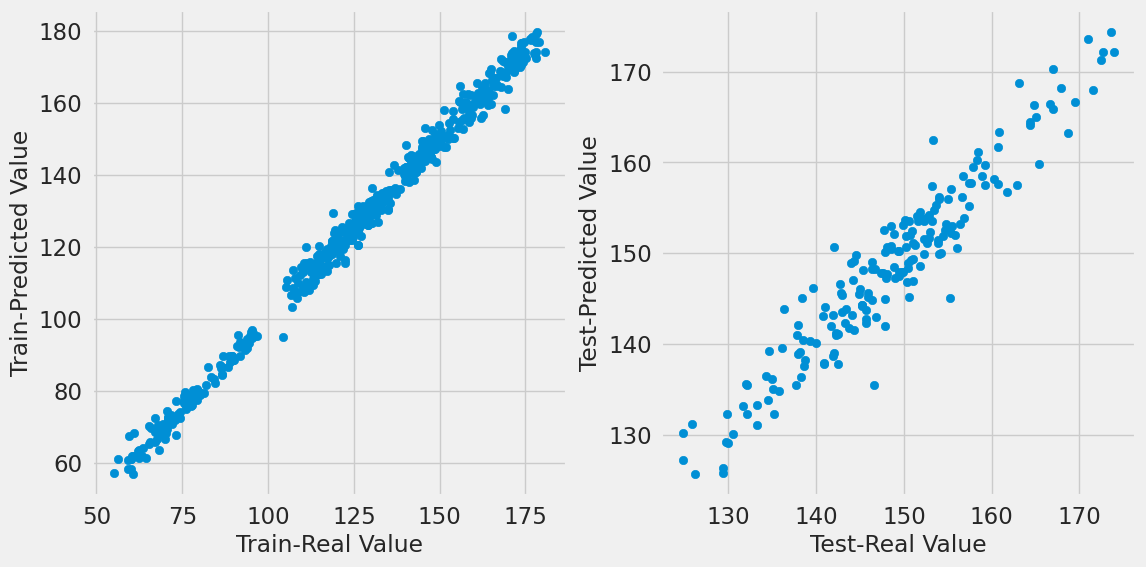

In [32]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].scatter(original_ytrain_SVR,train_predict_SVR)
ax[0].set_xlabel('Train-Real Value')
ax[0].set_ylabel('Train-Predicted Value');
#################################

ax[1].scatter(original_ytest_SVR,test_predict_SVR)
ax[1].set_xlabel('Test-Real Value')
ax[1].set_ylabel('Test-Predicted Value');

### Interpretation of These Values
Evaluation metrices RMSE, MSE and MAE
Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

When Outliers are important for us, we will look at The RMSE and MSE errors.
However,
When we do not want to take into account the outliers, we only pay attention to the MAE.

Considering the Apple stock Price, we Only Consider, MAE.
In general, The Lower Value of THESE Values Mentioned Above, The Better Model we Have.




In [33]:
print("Train data R2 score:", r2_score(original_ytrain_SVR, train_predict_SVR))
print("Test data R2 score:", r2_score(original_ytest_SVR, test_predict_SVR))

Train data R2 score: 0.9935606991096889
Test data R2 score: 0.9137993581029149


#### R2 score for regression
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

R2 = 1 The Best Value &
R2 = 0 or Smaller than Zero is The Worse


### Prediction of the Future Price

In [34]:
#Predicting Next 30 Days
x_input_SVR=test_data_SVR[len(test_data_SVR)-time_step:].reshape(1,-1)
temp_input_SVR=list(x_input_SVR)
temp_input_SVR=temp_input_SVR[0].tolist()

from numpy import array

SVR_output=[]
n_steps=time_step
i=0
pred_days_SVR = 29
while(i<pred_days_SVR):

    if(len(temp_input_SVR)>time_step):

        x_input_SVR=np.array(temp_input_SVR[1:])
        #print("{} day input {}".format(i,x_input))
        x_input_SVR=x_input_SVR.reshape(1,-1)

        yhat_SVR = svr_rbf.predict(x_input_SVR)
        #print("{} day output {}".format(i,yhat))
        temp_input_SVR.extend(yhat_SVR.tolist())
        temp_input_SVR=temp_input_SVR[1:]

        SVR_output.extend(yhat_SVR.tolist())
        i=i+1

    else:
        yhat_SVR = svr_rbf.predict(x_input_SVR)

        temp_input_SVR.extend(yhat_SVR.tolist())
        SVR_output.extend(yhat_SVR.tolist())

        i=i+1

In [35]:
last_days_SVR=np.arange(1,time_step+1)
day_pred_SVR=np.arange(time_step+1,time_step+pred_days_SVR+1)
print(last_days_SVR)
print(day_pred_SVR)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44]


In [42]:

new_pred_plot_SVR = pd.DataFrame({
    'last_original_days_value': last_original_days_value_SVR,
    'next_predicted_days_value': next_predicted_days_value_SVR
})


fig = px.line(
    new_pred_plot_SVR,
    x=new_pred_plot_SVR.index,
    y=['last_original_days_value', 'next_predicted_days_value'],
    labels={'value': 'Stock price', 'index': 'Timestamp'}
)


names = cycle(['Last 15 days Adj Close price', 'Predicted Next 29 days Close price'])
fig.for_each_trace(lambda t: t.update(name=next(names)))

# Colors
fig.data[0].update(line=dict(color='red', width=3))   # real
fig.data[1].update(line=dict(color='red', width=3))    # predicted

# Figure size
fig.update_layout(
    title_text='Compare last 15 days vs next 29 days',
    plot_bgcolor='white',
    font_size=15,
    font_color='black',
    legend_title_text='Adj Close',
    width=960,
    height=576
)

# ---------------------------------------------------------
# ADD VERTICAL DASHED LINE
# ---------------------------------------------------------

separator_x = time_step + 1   # boundary index

fig.add_vline(
    x=separator_x,
    line_width=2,
    line_dash="dash",
    line_color="black"
)

# ---------------------------------------------------------
# ADD ANNOTATION
# ---------------------------------------------------------

fig.add_annotation(
    x=separator_x + 5,
    y=max(new_pred_plot_SVR.max()),
    text="Predicted values",
    showarrow=False,
    font=dict(size=14, color="black")
)

# Clean axes
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()



In [43]:
SVR_DF = Apple_Data_AdjC_N_SVR.tolist()
SVR_DF.extend((np.array(SVR_output).reshape(-1,1)).tolist())
SVR_DF = scaler.inverse_transform(SVR_DF).reshape(1,-1).tolist()[0]

names = cycle(['Adj Close'])

fig = px.line(
    SVR_DF,
    labels={'value': 'Stock price', 'index': 'Timestamp'}
)

fig.update_layout(
    title_text='Plotting whole Adj Close stock price with prediction (SVR Model)',
    plot_bgcolor='white',
    font_size=15,
    font_color='black',
    legend_title_text='Stock',
    width=960,      # <--- FIGURE WIDTH
    height=576      # <--- FIGURE HEIGHT
)

fig.for_each_trace(lambda t: t.update(name=next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()


# Model 2- Random Forest

In [44]:
Apple_Data_M=pd.read_csv('AAPL_2020_2023_3.csv', header=0, index_col=0, parse_dates=True)

In [45]:
# Reset Index
Apple_Data_M.reset_index(inplace=True)
Apple_Data_M

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.449409,135480400
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.735321,146322800
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.314888,118387200
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.970093,108872000
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,74.143890,132079200
...,...,...,...,...,...,...,...
812,2023-03-24,158.860001,160.339996,157.850006,160.250000,160.250000,59196500
813,2023-03-27,159.940002,160.770004,157.869995,158.279999,158.279999,52390300
814,2023-03-28,157.970001,158.490005,155.979996,157.649994,157.649994,45992200
815,2023-03-29,159.369995,161.050003,159.350006,160.770004,160.770004,51305700


In [46]:
Apple_Data_AdjC_rf=Apple_Data_M[['Date','Adj Close']]
Apple_Data_AdjC_rf1=Apple_Data_AdjC_rf [['Adj Close']]

In [47]:
Apple_Data_AdjC_rf1

,Adj Close
0,73.449409
1,72.735321
2,73.314888
3,72.970093
4,74.143890
...,...
812,160.250000
813,158.279999
814,157.649994
815,160.770004


In [48]:
Apple_Data_AdjC_rf1_A=Apple_Data_AdjC_rf1.to_numpy()
Apple_Data_AdjC_rf1_A.shape

(817, 1)

In [49]:
train_rf=Apple_Data_AdjC_rf1_A[:600]
test_rf=Apple_Data_AdjC_rf1_A[600:]
train_rf.shape

(600, 1)

In [50]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [51]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
# This time_step divide into a data set matrix with 15 enteries.
time_step = 15
X_train_rf, y_train_rf = create_dataset(train_rf, time_step)
X_test_rf, y_test_rf = create_dataset(test_rf, time_step)

print("X_train: ", X_train_rf.shape)
print("y_train: ", y_train_rf.shape)
print("X_test: ", X_test_rf.shape)
print("y_test", y_test_rf.shape)
X_test_rf

X_train:  (584, 15)
y_train:  (584,)
X_test:  (201, 15)
y_test (201,)


array([[136.723572, 136.962463, 142.457306, ..., 148.031769, 147.285202,
        141.989456],
       [136.962463, 142.457306, 139.719833, ..., 147.285202, 141.989456,
        136.504578],
       [142.457306, 139.719833, 139.87912 , ..., 141.989456, 136.504578,
        131.278519],
       ...,
       [153.830002, 151.600006, 152.869995, ..., 157.830002, 158.929993,
        160.25    ],
       [151.600006, 152.869995, 150.589996, ..., 158.929993, 160.25    ,
        158.279999],
       [152.869995, 150.589996, 148.5     , ..., 160.25    , 158.279999,
        157.649994]])

In [52]:
original_y_train=y_train_rf.reshape(-1,1)
original_y_test=y_test_rf.reshape(-1,1)

In [53]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 1000, random_state = 0)
regressor_rf.fit(X_train_rf, y_train_rf)

RandomForestRegressor(n_estimators=1000, random_state=0)

In [54]:
# Lets Do the prediction
train_predict_rf=regressor_rf.predict(X_train_rf)
test_predict_rf=regressor_rf.predict(X_test_rf)

train_predict_rf = train_predict_rf.reshape(-1,1)
test_predict_rf = test_predict_rf.reshape(-1,1)

print("Train data prediction:", train_predict_rf.shape)
print("Test data prediction:", test_predict_rf.shape)

Train data prediction: (584, 1)
Test data prediction: (201, 1)


### Plotting Predicted & Real Values in Train and Test Section of DataSet

In [55]:
# shift train predictions for plotting
fig = plt.figure(figsize=(12,16))
look_back=time_step
trainPredictPlot_rf = np.empty_like(Apple_Data_AdjC_rf1_A)
trainPredictPlot_rf[:, :] = np.nan
trainPredictPlot_rf[look_back:len(train_predict_rf)+look_back ] = train_predict_rf
print("Train predicted data RF: ", trainPredictPlot_rf.shape)


Train predicted data RF:  (817, 1)


<Figure size 1200x1600 with 0 Axes>

In [56]:
# shift test predictions for plotting
testPredictPlot_rf = np.empty_like(Apple_Data_AdjC_rf1_A)
testPredictPlot_rf[:, :] = np.nan
testPredictPlot_rf[len(train_predict_rf)+(look_back*2)+1:len(Apple_Data_AdjC_rf1_A)-1] = test_predict_rf
print("Test predicted data rf: ", testPredictPlot_rf.shape)

Test predicted data rf:  (817, 1)


In [57]:
# shift test predictions for plotting
testPredictPlot_rf = np.empty_like(Apple_Data_AdjC_rf1_A)
testPredictPlot_rf[:, :] = np.nan
testPredictPlot_rf[len(train_predict_rf)+(look_back*2)+1:len(Apple_Data_AdjC_rf1_A)-1] = test_predict_rf
print("Test predicted data rf: ", testPredictPlot_rf.shape)

names_rf = cycle(['Original Adj Close Price','Train Predicted Adj Close Price','Test Predicted Adj Close Price'])

plotdf_rf = pd.DataFrame({
    'date': Apple_Data_AdjC_rf['Date'],
    'Original_Adj_Close': Apple_Data_AdjC_rf['Adj Close'],
    'Train_Predicted_Adj_Close': trainPredictPlot_rf.reshape(1,-1)[0].tolist(),
    'Test_Predicted_Adj_Close': testPredictPlot_rf.reshape(1,-1)[0].tolist()
})

fig = px.line(
    plotdf_rf,
    x='date',
    y=['Original_Adj_Close', 'Train_Predicted_Adj_Close', 'Test_Predicted_Adj_Close'],
    labels={'value': 'Stock price', 'date': 'Date'}
)

fig.update_layout(
    title_text='Comparison Between Original Adj Close Price vs Predicted Adj Close Price',
    font_size=12,
    font_color='black',
    legend_title_text='Adj Close Price',
    width=960,     # 10 inches
    height=576     # 6 inches
)

fig.for_each_trace(lambda t: t.update(name=next(names_rf)))

fig.show()


Test predicted data rf:  (817, 1)


### Evaluation of the Model

In [58]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_y_train,train_predict_rf)))
print("Train data MSE: ", mean_squared_error(original_y_train,train_predict_rf))
print("Test data MAE: ", mean_absolute_error(original_y_train,train_predict_rf))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_y_test,test_predict_rf)))
print("Test data MSE: ", mean_squared_error(original_y_test,test_predict_rf))
print("Test data MAE: ", mean_absolute_error(original_y_test,test_predict_rf))

Train data RMSE:  1.033832614997623
Train data MSE:  1.0688098758328233
Test data MAE:  0.7726282425770845
-------------------------------------------------------------------------------------
Test data RMSE:  3.2517053272868264
Test data MSE:  10.573587535505528
Test data MAE:  2.503920797457744


In [59]:
print("Train data R2 score:", r2_score(original_y_train , train_predict_rf))
print("Test data R2 score:", r2_score(original_y_test , test_predict_rf))

Train data R2 score: 0.9989465146044681
Test data R2 score: 0.90468175233457


### Predicting the Future Price

In [60]:
x_input_rf=test_rf[len(test_rf)-time_step:].reshape(1,-1)
temp_input_rf=list(x_input_rf)
temp_input_rf=temp_input_rf[0].tolist()

from numpy import array

RF_output=[]
n_steps=time_step
i=0
pred_days_rf = 29
while(i<pred_days_rf):

    if(len(temp_input_rf)>time_step):

        x_input_rf=np.array(temp_input_rf[1:])
        x_input_rf=x_input_rf.reshape(1,-1)

        yhat = regressor_rf.predict(x_input_rf)
        temp_input_rf.extend(yhat.tolist())
        temp_input_rf=temp_input_rf[1:]

        RF_output.extend(yhat.tolist())
        i=i+1

    else:
        yhat = regressor_rf.predict(x_input_rf)

        temp_input_rf.extend(yhat.tolist())
        RF_output.extend(yhat.tolist())

        i=i+1

print("Output of predicted next days: ", len(RF_output))

Output of predicted next days:  29


In [61]:
last_days_rf=np.arange(1,time_step+1)
day_pred_rf=np.arange(time_step+1,time_step+pred_days_rf+1)
print(last_days_rf)
print(day_pred_rf)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44]


In [67]:
temp_mat_rf = np.empty((len(last_days_rf)+pred_days_rf+1,1))
temp_mat_rf[:] = np.nan
temp_mat_rf = temp_mat_rf.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat_rf
next_predicted_days_value_rf = temp_mat_rf

last_original_days_value[0:time_step+1] = (
    Apple_Data_AdjC_rf1_A[len(Apple_Data_AdjC_rf1_A)-time_step:]
).reshape(1,-1).tolist()[0]

next_predicted_days_value_rf[time_step+1:] = (
    np.array(RF_output).reshape(-1,1)
).reshape(1,-1).tolist()[0]

new_pred_plot_rf = pd.DataFrame({
    'last_original_days_value': last_original_days_value,
    'next_predicted_days_value': next_predicted_days_value_rf
})

names_rf = cycle(['Last 15 days ', 'Predicted next 29 days'])

fig = px.line(
    new_pred_plot_rf,
    x=new_pred_plot_rf.index,
    y=['last_original_days_value', 'next_predicted_days_value'],
    labels={'value': 'Stock price', 'index': 'Timestamp'}
)

fig.update_layout(
    title_text='Compare last 15 days vs next 29 days',
    plot_bgcolor='white',
    font_size=15,
    font_color='black',
    legend_title_text='Adj Close',
    width=960,     # <--- FIGURE WIDTH
    height=576     # <--- FIGURE HEIGHT
)

fig.for_each_trace(lambda t: t.update(name=next(names_rf)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)



separator_x = time_step + 1

fig.add_vline(
    x=separator_x,
    line_width=2,
    line_dash="dash",
    line_color="black"
)



fig.add_annotation(
    x=separator_x + 3,
    y=max(new_pred_plot_rf.max()),
    text="Predicted values",
    showarrow=False,
    font=dict(size=14, color="black")
)

fig.show()


In [171]:
RF_DF = Apple_Data_AdjC_rf1_A.tolist()
RF_DF.extend((np.array(RF_output).reshape(-1,1)).tolist())
RF_DF1 = [item[0] for item in RF_DF]

names = cycle(['Adj Close'])

fig = px.line(
    RF_DF,
    labels={'value': 'Stock price', 'index': 'Timestamp'}
)

fig.update_layout(
    title_text='Plotting whole Adj Close stock price with prediction (RF Model)',
    plot_bgcolor='white',
    font_size=15,
    font_color='black',
    legend_title_text='Stock',
    width=960,      # <--- FIGURE WIDTH
    height=576      # <--- FIGURE HEIGHT
)

fig.for_each_trace(lambda t: t.update(name=next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()


# Model 3 - XG Boost

In [68]:
!pip install xgboost

In [70]:
# Reset Index
Apple_Data_M.reset_index(inplace=True)
Apple_Data_M

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.449409,135480400
1,1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.735321,146322800
2,2,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.314888,118387200
3,3,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.970093,108872000
4,4,2020-01-08,74.290001,76.110001,74.290001,75.797501,74.143890,132079200
...,...,...,...,...,...,...,...,...
812,812,2023-03-24,158.860001,160.339996,157.850006,160.250000,160.250000,59196500
813,813,2023-03-27,159.940002,160.770004,157.869995,158.279999,158.279999,52390300
814,814,2023-03-28,157.970001,158.490005,155.979996,157.649994,157.649994,45992200
815,815,2023-03-29,159.369995,161.050003,159.350006,160.770004,160.770004,51305700


In [71]:
Apple_Data_AdjC_XGB=Apple_Data_M[['Date','Adj Close']]
Apple_Data_AdjC_XGB1=Apple_Data_AdjC_XGB[['Adj Close']]

In [72]:
Apple_Data_AdjC_XGB1

,Adj Close
0,73.449409
1,72.735321
2,73.314888
3,72.970093
4,74.143890
...,...
812,160.250000
813,158.279999
814,157.649994
815,160.770004


In [73]:
Apple_Data_AdjC_XGB1_A=Apple_Data_AdjC_XGB1.to_numpy()
Apple_Data_AdjC_XGB1_A.shape


(817, 1)

In [74]:
train_XGB=Apple_Data_AdjC_XGB1_A[:600]
test_XGB=Apple_Data_AdjC_XGB1_A[600:]

In [75]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [76]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
# This time_step divide into a data set matrix with 15 enteries.
time_step = 15
X_train_XGB, y_train_XGB = create_dataset(train_XGB, time_step)
X_test_XGB, y_test_XGB = create_dataset(test_XGB, time_step)

print("X_train: ", X_train_XGB.shape)
print("y_train: ", y_train_XGB.shape)
print("X_test: ", X_test_XGB.shape)
print("y_test:", y_test_XGB.shape)


X_train:  (584, 15)
y_train:  (584,)
X_test:  (201, 15)
y_test: (201,)


In [77]:
Model_XGB = xgb.XGBRegressor(base_score=0.8,
                             booster='gbtree',
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=5,
                           learning_rate=0.01)

Model_XGB.fit(X_train_XGB, y_train_XGB,
            eval_set=[(X_train_XGB, y_train_XGB), (X_test_XGB, y_test_XGB)],
            verbose=100)

[0]	validation_0-rmse:127.38549	validation_1-rmse:145.90600
[100]	validation_0-rmse:47.21130	validation_1-rmse:54.17222
[200]	validation_0-rmse:17.62969	validation_1-rmse:20.26724
[300]	validation_0-rmse:6.82866	validation_1-rmse:8.07322
[400]	validation_0-rmse:3.05612	validation_1-rmse:4.25546
[500]	validation_0-rmse:1.81994	validation_1-rmse:3.43890
[600]	validation_0-rmse:1.41036	validation_1-rmse:3.33524
[700]	validation_0-rmse:1.24409	validation_1-rmse:3.32305
[766]	validation_0-rmse:1.17285	validation_1-rmse:3.32583


XGBRegressor(base_score=0.8, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [78]:
# Lets Do the prediction

train_predict_XGB=Model_XGB.predict(X_train_XGB)
test_predict_XGB=Model_XGB.predict(X_test_XGB)

train_predict_XGB = train_predict_XGB.reshape(-1,1)
test_predict_XGB = test_predict_XGB.reshape(-1,1)

print("Train data prediction:", train_predict_XGB.shape)
print("Test data prediction:", test_predict_XGB.shape)

Train data prediction: (584, 1)
Test data prediction: (201, 1)


In [79]:
# Transform back to original form
original_ytrain_XGB = y_train_XGB.reshape(-1,1)
original_ytest_XGB = y_test_XGB.reshape(-1,1)
original_ytrain_XGB.shape

(584, 1)

In [80]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain_XGB,train_predict_XGB)))
print("Train data MSE: ", mean_squared_error(original_ytrain_XGB,train_predict_XGB))
print("Train data MAE: ", mean_absolute_error(original_ytrain_XGB,train_predict_XGB))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest_XGB,test_predict_XGB)))
print("Test data MSE: ", mean_squared_error(original_ytest_XGB,test_predict_XGB))
print("Test data MAE: ", mean_absolute_error(original_ytest_XGB,test_predict_XGB))

Train data RMSE:  1.2250294486496487
Train data MSE:  1.5006971500588622
Train data MAE:  0.9449385719453994
-------------------------------------------------------------------------------------
Test data RMSE:  3.321121981399078
Test data MSE:  11.02985121533214
Test data MAE:  2.5619135447129584


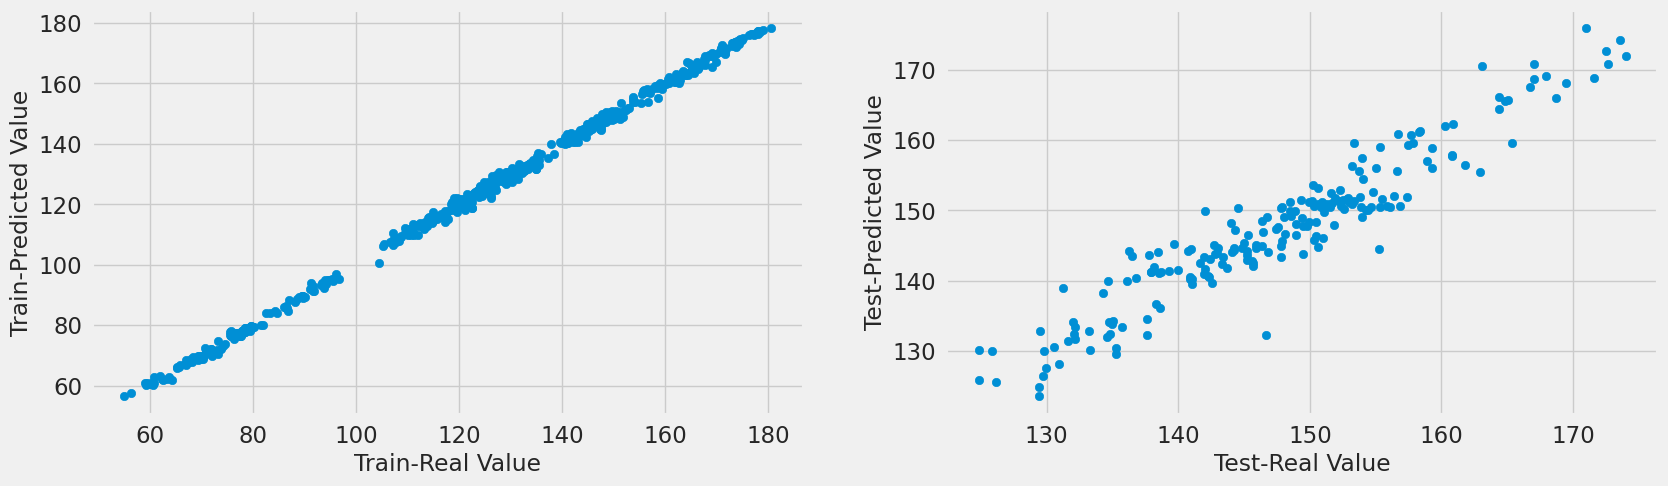

In [81]:
#Test and Train Scatter Plot
fig, ax = plt.subplots(1,2,figsize=(18,5))
ax[0].scatter(original_ytrain_XGB,train_predict_XGB)
ax[0].set_xlabel('Train-Real Value')
ax[0].set_ylabel('Train-Predicted Value');
#################################
ax[1].scatter(original_ytest_XGB,test_predict_XGB)
ax[1].set_xlabel('Test-Real Value')
ax[1].set_ylabel('Test-Predicted Value');


In [82]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot_XGB = np.empty_like(Apple_Data_AdjC_XGB1)
trainPredictPlot_XGB[:, :] = np.nan
trainPredictPlot_XGB[look_back:len(train_predict_XGB)+look_back, :] = train_predict_XGB
print("Train predicted data: ", trainPredictPlot_XGB.shape)


Train predicted data:  (817, 1)


In [83]:
# shift test predictions for plotting
testPredictPlot_XGB = np.empty_like(Apple_Data_AdjC_XGB1)
testPredictPlot_XGB[:, :] = np.nan
testPredictPlot_XGB[len(train_predict_XGB)+(look_back*2)+1:len(Apple_Data_AdjC_XGB1)-1, :] = test_predict_XGB
print("Test predicted data: ", testPredictPlot_XGB.shape)



Test predicted data:  (817, 1)


In [84]:


names = cycle(['Original close price',
               'Train predicted Adj Close price',
               'Test predicted Adj Close price'])

plotdf_XGB = pd.DataFrame({
    'date': Apple_Data_AdjC_XGB['Date'],
    'original_Adj_Close': Apple_Data_AdjC_XGB['Adj Close'],
    'train_predicted_Adj_Close': trainPredictPlot_XGB.reshape(1,-1)[0].tolist(),
    'test_predicted_Adj_Close': testPredictPlot_XGB.reshape(1,-1)[0].tolist()
})

fig = px.line(
    plotdf_XGB,
    x='date',
    y=['original_Adj_Close',
       'train_predicted_Adj_Close',
       'test_predicted_Adj_Close'],
    labels={'value': 'Apple Stock Price', 'date': 'Date'}
)

# Rename traces
fig.for_each_trace(lambda t: t.update(name=next(names)))

# Force custom colors
fig.data[0].update(line=dict(color='blue', width=2))   # Original
fig.data[1].update(line=dict(color='green', width=2))  # Train predicted
fig.data[2].update(line=dict(color='red', width=2))    # Test predicted

# Add figure size
fig.update_layout(
    title_text='Real & Predicted Value of Stock Price (XGB Model)',
    plot_bgcolor='white',
    font_size=12,
    font_color='black',
    legend_title_text='Adj Close Price',
    width=960,     # 10 inches
    height=576     # 6 inches
)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()


In [85]:
#Predicting Next 15 Days
x_input_XGB=test_XGB[len(test_XGB)-time_step:].reshape(1,-1)
temp_input_XGB=list(x_input_XGB)
temp_input_XGB=temp_input_XGB[0].tolist()

from numpy import array

XGB_output=[]
n_steps=time_step
i=0
pred_days_XGB = 29
while(i<pred_days_XGB):

    if(len(temp_input_XGB)>time_step):

        x_input_XGB=np.array(temp_input_XGB[1:])
        #print("{} day input {}".format(i,x_input))
        x_input_XGB=x_input_XGB.reshape(1,-1)

        yhat_XGB =Model_XGB.predict(x_input_XGB)
        #print("{} day output {}".format(i,yhat))
        temp_input_XGB.extend(yhat_XGB.tolist())
        temp_input_XGB=temp_input_XGB[1:]

        XGB_output.extend(yhat_XGB.tolist())
        i=i+1

    else:
        yhat_XGB = Model_XGB.predict(x_input_XGB)

        temp_input_XGB.extend(yhat_XGB.tolist())
        XGB_output.extend(yhat_XGB.tolist())

        i=i+1

In [86]:
last_days_XGB=np.arange(1,time_step+1)
day_pred_XGB=np.arange(time_step+1,time_step+pred_days_XGB+1)
print(last_days_XGB)
print(day_pred_XGB)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44]


In [87]:
# Build dataframe
new_pred_plot_XGB = pd.DataFrame({
    'last_original_days_value': last_original_days_value_XGB,
    'next_predicted_days_value': next_predicted_days_value_XGB
})

# Create figure
fig = px.line(
    new_pred_plot_XGB,
    x=new_pred_plot_XGB.index,
    y=['last_original_days_value', 'next_predicted_days_value'],
    labels={'value': 'Stock price', 'index': 'Timestamp'}
)

# Rename traces
names = cycle(['Last 15 days Adj Close price', 'Predicted Next 29 days Close price'])
fig.for_each_trace(lambda t: t.update(name=next(names)))

# Force colors manually
fig.data[0].update(line=dict(color='red', width=3))   # last 15 days
fig.data[1].update(line=dict(color='red', width=3))   # next 29 days

fig.update_layout(
    title_text='Compare last 15 days vs next 29 days',
    plot_bgcolor='white',
    font_size=15,
    font_color='black',
    legend_title_text='Adj Close',
    width=960,
    height=576
)


separator_x = time_step + 1
fig.add_vline(
    x=separator_x,
    line_width=2,
    line_dash="dash",
    line_color="black"
)


fig.add_annotation(
    x=separator_x + 5,
    y=max(new_pred_plot_XGB.max()),
    text="Predicted values",
    showarrow=False,
    font=dict(size=14, color="black")
)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()







In [172]:
XGB_DF = Apple_Data_AdjC_XGB1_A.tolist()
XGB_DF.extend((np.array(XGB_output).reshape(-1,1)).tolist())
XGB_DF1 = [item[0] for item in XGB_DF]

names = cycle(['Adj Close'])

fig = px.line(
    XGB_DF,
    labels={'value': 'Stock price', 'index': 'Timestamp'}
)

fig.update_layout(
    title_text='Plotting whole Adj Close stock price with prediction (XGB Model)',
    plot_bgcolor='white',
    font_size=15,
    font_color='black',
    legend_title_text='Stock',
    width=960,      # <--- FIGURE WIDTH
    height=576      # <--- FIGURE HEIGHT
)

fig.for_each_trace(lambda t: t.update(name=next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()


# Stock Price Prediction by Deep Learning Models -- RNN (Recurrent Neural Network)

In [88]:
Apple_Data_M=pd.read_csv('AAPL_2020_2023_3.csv', header=0, index_col=0, parse_dates=True)

In [89]:
Apple_Data_M.reset_index(inplace=True)
Apple_Data_M

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.449409,135480400
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.735321,146322800
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.314888,118387200
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.970093,108872000
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,74.143890,132079200
...,...,...,...,...,...,...,...
812,2023-03-24,158.860001,160.339996,157.850006,160.250000,160.250000,59196500
813,2023-03-27,159.940002,160.770004,157.869995,158.279999,158.279999,52390300
814,2023-03-28,157.970001,158.490005,155.979996,157.649994,157.649994,45992200
815,2023-03-29,159.369995,161.050003,159.350006,160.770004,160.770004,51305700


In [90]:
Apple_Data_AdjC_RNN=Apple_Data_M[['Date','Adj Close']]
Apple_Data_AdjC_RNN

,Date,Adj Close
0,2020-01-02,73.449409
1,2020-01-03,72.735321
2,2020-01-06,73.314888
3,2020-01-07,72.970093
4,2020-01-08,74.143890
...,...,...
812,2023-03-24,160.250000
813,2023-03-27,158.279999
814,2023-03-28,157.649994
815,2023-03-29,160.770004


In [91]:
# Normalize Data
Apple_Data_AdjC_N_RNN = Apple_Data_AdjC_RNN.copy()
del Apple_Data_AdjC_RNN['Date']
scaler=MinMaxScaler(feature_range=(0,1))
Apple_Data_AdjC_RNN=scaler.fit_transform(np.array(Apple_Data_AdjC_RNN).reshape(-1,1))
print(Apple_Data_AdjC_RNN.shape)

(817, 1)


In [92]:
training_size_RNN =int(len( Apple_Data_AdjC_RNN)*0.8)
test_size_RNN=len( Apple_Data_AdjC_RNN)-training_size_RNN
train_data_RNN,test_data_RNN = Apple_Data_AdjC_RNN[0:training_size_RNN,:], Apple_Data_AdjC_RNN[training_size_RNN:len( Apple_Data_AdjC_RNN),:1]
print("train_data: ", train_data_RNN.shape)
print("test_data: ", test_data_RNN.shape)

train_data:  (653, 1)
test_data:  (164, 1)


In [93]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [94]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
# This time_step divide into a data set matrix with 15 enteries.
time_step = 15
X_train_RNN, y_train_RNN = create_dataset(train_data_RNN, time_step)
X_test_RNN, y_test_RNN = create_dataset(test_data_RNN, time_step)

print("X_train: ", X_train_RNN.shape)
print("y_train: ", y_train_RNN.shape)
print("X_test: ", X_test_RNN.shape)
print("y_test", y_test_RNN.shape)


X_train:  (637, 15)
y_train:  (637,)
X_test:  (148, 15)
y_test (148,)


In [95]:
#THE data set is related to the data set before
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train_RNN =X_train_RNN.reshape(X_train_RNN.shape[0],X_train_RNN.shape[1] , 1)
X_test_RNN = X_test_RNN.reshape(X_test_RNN.shape[0],X_test_RNN.shape[1] , 1)

print("X_train: ", X_train_RNN.shape)
print("X_test: ", X_test_RNN.shape)

X_train:  (637, 15, 1)
X_test:  (148, 15, 1)


In [96]:
#LSTM model structure
tf.keras.backend.clear_session()
model_RNN = Sequential()
model_RNN.add(SimpleRNN(32, return_sequences=True,activation='relu', input_shape=(time_step, 1)))
model_RNN.add(SimpleRNN(32,return_sequences=True , activation='sigmoid'))
model_RNN.add(SimpleRNN(32))
model_RNN.add(Dense(1))
model_RNN.compile(loss='mean_squared_error',optimizer='adam')
model_RNN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 15, 32)         │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 15, 32)         │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,281 (20.63 KB)

 Trainable params: 5,281 (20.63 KB)

 Non-trainable params: 0 (0.00 B)

In [97]:
model_RNN.compile(optimizer='adam',loss='mean_squared_error')
history_RNN= model_RNN.fit(X_train_RNN,y_train_RNN,validation_data=(X_test_RNN,y_test_RNN),epochs=160,batch_size=6)

Epoch 1/160
107/107 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - loss: 0.0928 - val_loss: 0.0014
Epoch 2/160
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 3/160
107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 4/160
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 5/160
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 6/160
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 7/160
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 8/160
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 9/160
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 10/160
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 11/160
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 12/160
107/107 ━━━━━━━━

## Evaluation Of the Model

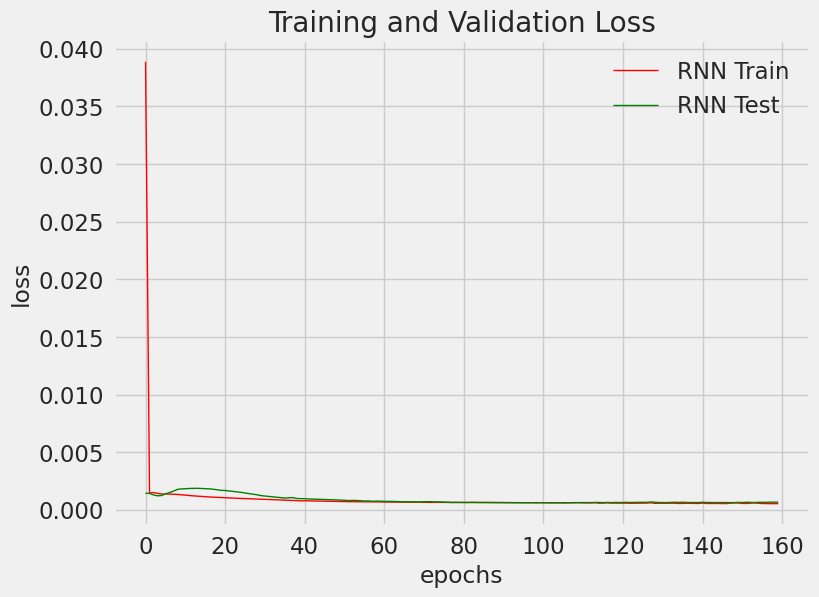

In [98]:
plt.figure(figsize=(8,6),dpi=100)
plt.plot(history_RNN.history['loss'],label='RNN Train',color='red',linewidth=1)
plt.plot(history_RNN.history['val_loss'],label='RNN Test',color='green', linewidth=1)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [99]:
### Lets Do the prediction and check performance metrics
train_predict_RNN=model_RNN.predict(X_train_RNN)
test_predict_RNN=model_RNN.predict(X_test_RNN)
train_predict_RNN.shape, test_predict_RNN.shape

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


((637, 1), (148, 1))

In [100]:
# Transform back to original form
train_predict_RNN = scaler.inverse_transform(train_predict_RNN)
test_predict_RNN = scaler.inverse_transform(test_predict_RNN)
original_ytrain_RNN = scaler.inverse_transform(y_train_RNN.reshape(-1,1))
original_ytest_RNN = scaler.inverse_transform(y_test_RNN.reshape(-1,1))

In [101]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain_RNN,train_predict_RNN)))
print("Train data MSE: ", mean_squared_error(original_ytrain_RNN,train_predict_RNN))
print("Train data MAE: ", mean_absolute_error(original_ytrain_RNN,train_predict_RNN))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest_RNN,test_predict_RNN)))
print("Test data MSE: ", mean_squared_error(original_ytest_RNN,test_predict_RNN))
print("Test data MAE: ", mean_absolute_error(original_ytest_RNN,test_predict_RNN))

Train data RMSE:  2.907496932620878
Train data MSE:  8.453538413199814
Train data MAE:  2.287126599020294
-------------------------------------------------------------------------------------
Test data RMSE:  3.2509497919237598
Test data MSE:  10.568674549609138
Test data MAE:  2.529945836122255


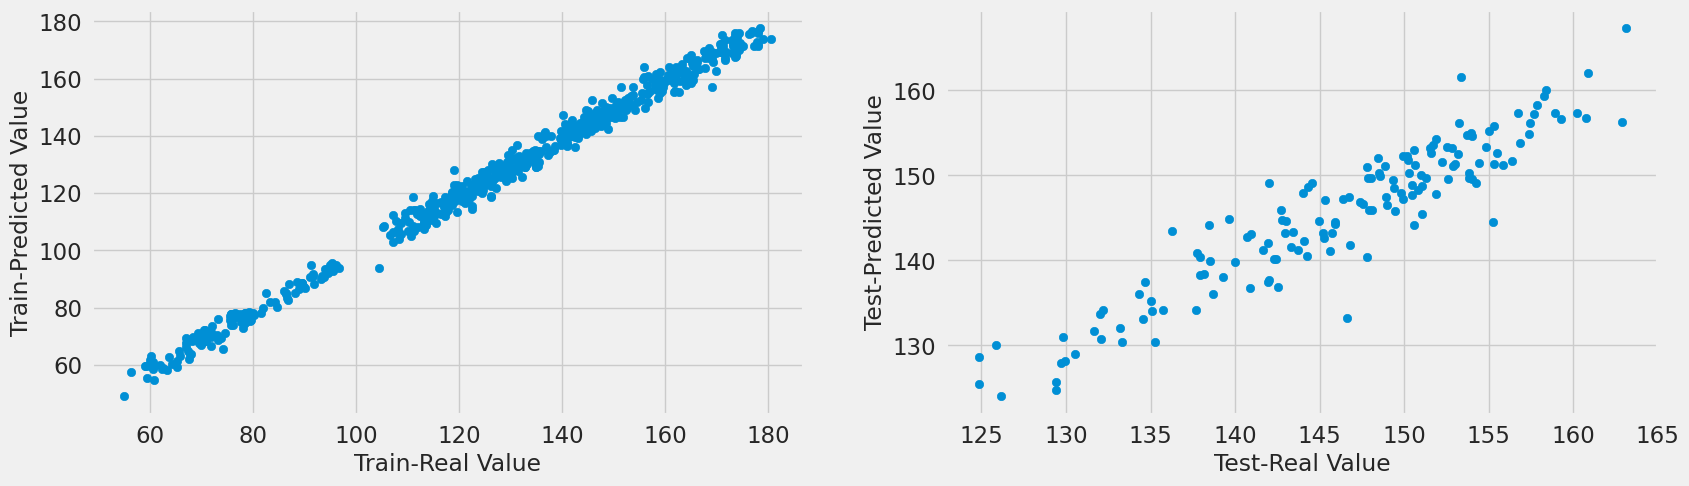

In [102]:
#Test and Train Scatter Plot
fig, ax = plt.subplots(1,2,figsize=(18,5))
ax[0].scatter(original_ytrain_RNN,train_predict_RNN)
ax[0].set_xlabel('Train-Real Value')
ax[0].set_ylabel('Train-Predicted Value');
#################################
ax[1].scatter(original_ytest_RNN,test_predict_RNN)
ax[1].set_xlabel('Test-Real Value')
ax[1].set_ylabel('Test-Predicted Value');

In [103]:
# shift train predictions for plotting
fig = plt.figure(figsize=(12,8))
look_back=time_step
trainPredictPlot_RNN = np.empty_like(Apple_Data_AdjC_RNN)
trainPredictPlot_RNN[:, :] = np.nan
trainPredictPlot_RNN[look_back:len(train_predict_RNN)+look_back] = train_predict_RNN
print("Train predicted data RNN: ", trainPredictPlot_RNN.shape)
# If I convert array to dataframe and then extract general information, it shows me the prices

Train predicted data RNN:  (817, 1)


<Figure size 1200x800 with 0 Axes>

In [104]:
# shift test predictions for plotting
testPredictPlot_RNN = np.empty_like(Apple_Data_AdjC_RNN)
testPredictPlot_RNN[:, :] = np.nan
testPredictPlot_RNN[len(train_predict_RNN)+(look_back*2)+1:len(Apple_Data_AdjC_RNN)-1 ,:] = test_predict_RNN
print("Test predicted data RNN: ", testPredictPlot_RNN.shape)

Test predicted data RNN:  (817, 1)


In [105]:
#Convert to data frame
names_RNN = cycle(['Original Adj Close Price','Train Predicted Adj Close Price','Test Predicted Adj Close Price'])

plotdf_RNN=pd.DataFrame({'date': Apple_Data_AdjC_N_RNN['Date'],
                       'Original_Adj_Close': Apple_Data_AdjC_N_RNN['Adj Close'],
                      'Train_Predicted_Adj_Close': trainPredictPlot_RNN.reshape(1,-1)[0].tolist(),
                      'Test_Predicted_Adj_Close': testPredictPlot_RNN.reshape(1,-1)[0].tolist()})


In [106]:
# Plotting the test and train results
fig = px.line(
    plotdf_RNN,
    x=plotdf_RNN['date'],
    y=[
        plotdf_RNN['Original_Adj_Close'],
        plotdf_RNN['Train_Predicted_Adj_Close'],
        plotdf_RNN['Test_Predicted_Adj_Close']
    ],
    labels={'value': 'Stock price', 'date': 'Date'}
)

fig.update_layout(
    title_text='Comparision Between Original Adj Close Price vs Predicted Adj Close Price',
    font_size=12,
    font_color='black',
    legend_title_text='Adj Close Price',
    width=960,     # 10 inches
    height=576     # 6 inches
)

fig.for_each_trace(lambda t: t.update(name=next(names_RNN)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()


## Prediction of The Future

In [107]:
x_input_RNN=test_data_RNN[len(test_data_RNN)-time_step:].reshape(1,-1)
temp_input_RNN=list(x_input_RNN)
temp_input_RNN=temp_input_RNN[0].tolist()

from numpy import array

RNN_output=[]
n_steps=time_step
i=0
pred_days_RNN = 29
while(i<pred_days_RNN):

    if(len(temp_input_RNN)>time_step):

        x_input_RNN=np.array(temp_input_RNN[1:])
        #print("{} day input {}".format(i,x_input))
        x_input_RNN = x_input_RNN.reshape(1,-1)
        x_input_RNN = x_input_RNN.reshape((1, n_steps, 1))

        yhat = model_RNN.predict(x_input_RNN, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input_RNN.extend(yhat[0].tolist())
        temp_input_RNN=temp_input_RNN[1:]
        #print(temp_input)

        RNN_output.extend(yhat.tolist())
        i=i+1

    else:

        x_input_RNN = x_input_RNN.reshape((1, n_steps,1))
        yhat_RNN = model_RNN.predict(x_input_RNN, verbose=0)
        temp_input_RNN.extend(yhat_RNN[0].tolist())

        RNN_output.extend(yhat_RNN.tolist())
        i=i+1

#print("Output of predicted next days: ", len(lst_output))

In [108]:
last_days_RNN=np.arange(1,time_step+1)
day_pred_RNN=np.arange(time_step+1,time_step+pred_days_RNN+1)
print(last_days_RNN)
print(day_pred_RNN)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44]


In [111]:
temp_mat_RNN = np.empty((len(last_days_RNN)+pred_days_RNN,1))
temp_mat_RNN[:] = np.nan
temp_mat_RNN = temp_mat_RNN.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat_RNN
next_predicted_days_value_RNN = temp_mat_RNN

last_original_days_value[0:time_step+1] = (
    scaler.inverse_transform(
        Apple_Data_AdjC_RNN[len(Apple_Data_AdjC_RNN)-time_step:]
    ).reshape(1,-1).tolist()[0]
)

next_predicted_days_value_RNN[time_step:] = (
    scaler.inverse_transform(
        np.array(RNN_output).reshape(-1,1)
    ).reshape(1,-1).tolist()[0]
)

new_pred_plot_RNN = pd.DataFrame({
    'last_original_days_value': last_original_days_value,
    'next_predicted_days_value': next_predicted_days_value_RNN
})

names_RNN = cycle(['Last 15 days', 'Predicted next 29 days'])

fig = px.line(
    new_pred_plot_RNN,
    x=new_pred_plot_RNN.index,
    y=['last_original_days_value', 'next_predicted_days_value'],
    labels={'value': 'Stock price', 'index': 'Timestamp'}
)

fig.update_layout(
    title_text='The Apple Stock Price of last 15 days & Predicted Next 29 days',
    plot_bgcolor='white',
    font_size=15,
    font_color='black',
    legend_title_text='Adj Close',
    width=960,      # <--- FIGURE WIDTH
    height=576      # <--- FIGURE HEIGHT
)

fig.for_each_trace(lambda t: t.update(name=next(names_RNN)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)



separator_x = time_step     # RNN prediction starts at index = time_step

fig.add_vline(
    x=separator_x,
    line_width=2,
    line_dash="dash",
    line_color="black"
)



fig.add_annotation(
    x=separator_x + 3,
    y=max(new_pred_plot_RNN.max()),
    text="Predicted values",
    showarrow=False,
    font=dict(size=14, color="black")
)

fig.show()


In [112]:
RNN_DF = Apple_Data_AdjC_RNN.tolist()
RNN_DF.extend((np.array(RNN_output).reshape(-1,1)).tolist())
RNN_DF = scaler.inverse_transform(RNN_DF).reshape(1,-1).tolist()[0]

names = cycle(['Adj Close'])

fig = px.line(
    RNN_DF,
    labels={'value': 'Stock price', 'index': 'Timestamp'}
)

fig.update_layout(
    title_text='Plotting whole Adj Close stock price with prediction (RNN Model)',
    plot_bgcolor='white',
    font_size=15,
    font_color='black',
    legend_title_text='Stock',
    width=960,     # 10 inches
    height=576     # 6 inches
)

fig.for_each_trace(lambda t: t.update(name=next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()


# LSTM  (Long Short Term Memory)

In [113]:
Apple_Data_M=pd.read_csv('AAPL_2020_2023_3.csv', header=0, index_col=0, parse_dates=True)

In [114]:
# Reset Index
Apple_Data_M.reset_index(inplace=True)
Apple_Data_M

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.449409,135480400
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.735321,146322800
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.314888,118387200
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.970093,108872000
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,74.143890,132079200
...,...,...,...,...,...,...,...
812,2023-03-24,158.860001,160.339996,157.850006,160.250000,160.250000,59196500
813,2023-03-27,159.940002,160.770004,157.869995,158.279999,158.279999,52390300
814,2023-03-28,157.970001,158.490005,155.979996,157.649994,157.649994,45992200
815,2023-03-29,159.369995,161.050003,159.350006,160.770004,160.770004,51305700


In [115]:
Apple_Data_AdjC_lstm=Apple_Data_M[['Date','Adj Close']]
Apple_Data_AdjC_lstm

,Date,Adj Close
0,2020-01-02,73.449409
1,2020-01-03,72.735321
2,2020-01-06,73.314888
3,2020-01-07,72.970093
4,2020-01-08,74.143890
...,...,...
812,2023-03-24,160.250000
813,2023-03-27,158.279999
814,2023-03-28,157.649994
815,2023-03-29,160.770004


In [116]:
# Normalize Data
Apple_Data_AdjC_N_lstm = Apple_Data_AdjC_lstm.copy()
del Apple_Data_AdjC_lstm['Date']
scaler=MinMaxScaler(feature_range=(0,1))
Apple_Data_AdjC_lstm=scaler.fit_transform(np.array(Apple_Data_AdjC_lstm).reshape(-1,1))
print(Apple_Data_AdjC_lstm.shape)

(817, 1)


In [117]:
training_size_lstm=int(len( Apple_Data_AdjC_lstm)*0.80)
test_size_lstm=len( Apple_Data_AdjC_lstm)-training_size_lstm
train_data_lstm,test_data_lstm= Apple_Data_AdjC_lstm[0:training_size_lstm,:], Apple_Data_AdjC_lstm[training_size_lstm:len( Apple_Data_AdjC_lstm),:1]
print("train_data: ", train_data_lstm.shape)
print("test_data: ", test_data_lstm.shape)

train_data:  (653, 1)
test_data:  (164, 1)




The function takes two arguments:
the **dataset**, which is a NumPy array you want to convert into a dataset, and the **look_back**, which is the number of previous time steps to use as input variables to predict the next time period—in this case, defaulted to 1.

This default will create a dataset where X is the number of passengers at a given time (t), and Y is the number of passengers at the next time (t + 1).


In [118]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [119]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
# This time_step divide into a data set matrix with 15 enteries.
time_step = 15
X_train_lstm, y_train_lstm = create_dataset(train_data_lstm, time_step)
X_test_lstm, y_test_lstm = create_dataset(test_data_lstm, time_step)

print("X_train: ", X_train_lstm.shape)
print("y_train: ", y_train_lstm.shape)
print("X_test: ", X_test_lstm.shape)
print("y_test", y_test_lstm.shape)
X_train_lstm
#y_test_lstm

X_train:  (637, 15)
y_train:  (637,)
X_test:  (148, 15)
y_test (148,)


array([[0.14679894, 0.14111737, 0.14572864, ..., 0.17835822, 0.18055686,
        0.18353378],
       [0.14111737, 0.14572864, 0.14298531, ..., 0.18055686, 0.18353378,
        0.18174371],
       [0.14572864, 0.14298531, 0.15232452, ..., 0.18353378, 0.18174371,
        0.16353197],
       ...,
       [0.70979315, 0.7176341 , 0.71470375, ..., 0.80420106, 0.80863648,
        0.84950412],
       [0.7176341 , 0.71470375, 0.73830575, ..., 0.80863648, 0.84950412,
        0.84158401],
       [0.71470375, 0.73830575, 0.75176994, ..., 0.84950412, 0.84158401,
        0.82970392]])

In [120]:
#THE data set is related to the data set before
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train_lstm =X_train_lstm.reshape(X_train_lstm.shape[0],X_train_lstm.shape[1] , 1)
X_test_lstm = X_test_lstm.reshape(X_test_lstm.shape[0],X_test_lstm.shape[1] , 1)

print("X_train: ", X_train_lstm.shape)
print("X_test: ", X_test_lstm.shape)

X_train:  (637, 15, 1)
X_test:  (148, 15, 1)


In [121]:
#LSTM model structure
tf.keras.backend.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(32, return_sequences=True,activation='relu', input_shape=(time_step, 1)))
model_lstm.add(LSTM(32,return_sequences=True , activation='sigmoid'))
model_lstm.add(LSTM(32))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error',optimizer='adam')
model_lstm.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 15, 32)         │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 15, 32)         │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,025 (82.13 KB)

 Trainable params: 21,025 (82.13 KB)

 Non-trainable params: 0 (0.00 B)

In [122]:
model_lstm.compile(optimizer='adam',loss='mean_squared_error')
history_lstm= model_lstm.fit(X_train_lstm,y_train_lstm,validation_data=(X_test_lstm,y_test_lstm),epochs=150,batch_size=5)

Epoch 1/150
128/128 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0603 - val_loss: 0.0037
Epoch 2/150
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0036 - val_loss: 0.0034
Epoch 3/150
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 4/150
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0030 - val_loss: 0.0027
Epoch 5/150
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0029 - val_loss: 0.0024
Epoch 6/150
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0028 - val_loss: 0.0023
Epoch 7/150
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0027 - val_loss: 0.0021
Epoch 8/150
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0026 - val_loss: 0.0021
Epoch 9/150
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0024 - val_loss: 0.0020
Epoch 10/150
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0024 - val_loss: 0.0020
Epoch 11/150
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0023 - val_loss: 0.0020
Epoch 12/150
128/128 ━━━━━━━━━

#### Result: Increasing Trend
##https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/

## Evaluation of The Model

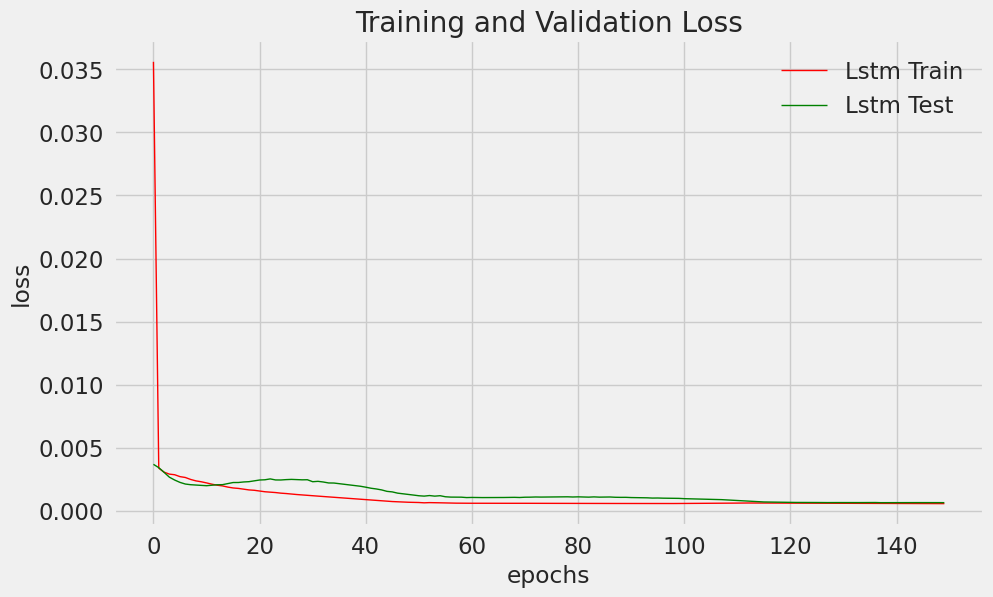

In [123]:
plt.figure(figsize=(10,6),dpi=100)
plt.plot(history_lstm.history['loss'],label='Lstm Train',color='red',linewidth=1)
plt.plot(history_lstm.history['val_loss'],label='Lstm Test',color='green', linewidth=1)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [124]:
### Lets Do the prediction and check performance metrics
train_predict_lstm=model_lstm.predict(X_train_lstm)
test_predict_lstm=model_lstm.predict(X_test_lstm)
train_predict_lstm.shape, test_predict_lstm.shape

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


((637, 1), (148, 1))

In [126]:
# Transform back to original form

train_predict_lstm = scaler.inverse_transform(train_predict_lstm)
test_predict_lstm = scaler.inverse_transform(test_predict_lstm)
original_ytrain_lstm = scaler.inverse_transform(y_train_lstm.reshape(-1,1))
original_ytest_lstm = scaler.inverse_transform(y_test_lstm.reshape(-1,1))

In [127]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain_lstm,train_predict_lstm)))
print("Train data MSE: ", mean_squared_error(original_ytrain_lstm,train_predict_lstm))
print("Test data MAE: ", mean_absolute_error(original_ytrain_lstm,train_predict_lstm))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest_lstm,test_predict_lstm)))
print("Test data MSE: ", mean_squared_error(original_ytest_lstm,test_predict_lstm))
print("Test data MAE: ", mean_absolute_error(original_ytest_lstm,test_predict_lstm))

Train data RMSE:  2.847088913619593
Train data MSE:  8.105915282055596
Test data MAE:  2.2366653152713987
-------------------------------------------------------------------------------------
Test data RMSE:  3.2027034087473716
Test data MSE:  10.257309124402033
Test data MAE:  2.496188757475982


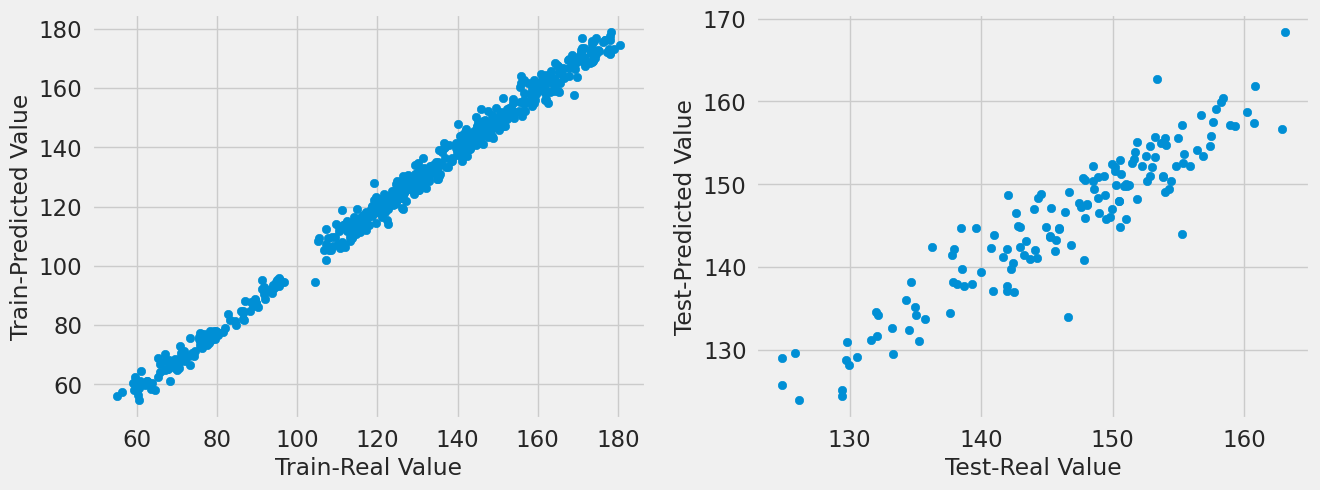

In [128]:
#Test and Train Scatter Plot
fig, ax = plt.subplots(1,2,figsize=(14,5))
ax[0].scatter(original_ytrain_lstm,train_predict_lstm)
ax[0].set_xlabel('Train-Real Value')
ax[0].set_ylabel('Train-Predicted Value');
#################################
ax[1].scatter(original_ytest_lstm,test_predict_lstm)
ax[1].set_xlabel('Test-Real Value')
ax[1].set_ylabel('Test-Predicted Value');


### Plotting the Real & Predicted Value

In [129]:
# shift train predictions for plotting
fig = plt.figure(figsize=(12,16))
look_back=time_step
trainPredictPlot_lstm = np.empty_like(Apple_Data_AdjC_lstm)
trainPredictPlot_lstm[:, :] = np.nan
trainPredictPlot_lstm[look_back:len(train_predict_lstm)+look_back] = train_predict_lstm
print("Train predicted data lstm: ", trainPredictPlot_lstm.shape)
# If I convert array to dataframe and then extract general information, it shows me the prices


Train predicted data lstm:  (817, 1)


<Figure size 1200x1600 with 0 Axes>

In [130]:
# shift test predictions for plotting
testPredictPlot_lstm = np.empty_like(Apple_Data_AdjC_lstm)
testPredictPlot_lstm[:, :] = np.nan
testPredictPlot_lstm[len(train_predict_lstm)+(look_back*2)+1:len(Apple_Data_AdjC_lstm)-1 ,:] = test_predict_lstm
print("Test predicted data lstm: ", testPredictPlot_lstm.shape)



Test predicted data lstm:  (817, 1)


In [131]:
#Convert to data frame
names_lstm = cycle(['Original Adj Close Price','Train Predicted Adj Close Price','Test Predicted Adj Close Price'])

plotdf_lstm=pd.DataFrame({'date': Apple_Data_AdjC_N_lstm['Date'],
                       'Original_Adj_Close': Apple_Data_AdjC_N_lstm['Adj Close'],
                      'Train_Predicted_Adj_Close': trainPredictPlot_lstm.reshape(1,-1)[0].tolist(),
                      'Test_Predicted_Adj_Close': testPredictPlot_lstm.reshape(1,-1)[0].tolist()})


In [132]:
# Plotting the test and train results
fig = px.line(
    plotdf_lstm,
    x=plotdf_lstm['date'],
    y=[
        plotdf_lstm['Original_Adj_Close'],
        plotdf_lstm['Train_Predicted_Adj_Close'],
        plotdf_lstm['Test_Predicted_Adj_Close']
    ],
    labels={'value': 'Stock price', 'date': 'Date'}
)

fig.update_layout(
    title_text='Comparision Between Original Adj Close Price vs Predicted Adj Close Price',
    font_size=12,
    font_color='black',
    legend_title_text='Adj Close Price',
    width=960,     # 10 inches
    height=576     # 6 inches
)

fig.for_each_trace(lambda t: t.update(name=next(names_lstm)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()


### Prediction the Future Price

In [133]:
x_input_lstm=test_data_lstm[len(test_data_lstm)-time_step:].reshape(1,-1)
temp_input_lstm=list(x_input_lstm)
temp_input_lstm=temp_input_lstm[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days_lstm = 29
while(i<pred_days_lstm):

    if(len(temp_input_lstm)>time_step):

        x_input_lstm=np.array(temp_input_lstm[1:])
        #print("{} day input {}".format(i,x_input))
        x_input_lstm = x_input_lstm.reshape(1,-1)
        x_input_lstm = x_input_lstm.reshape((1, n_steps, 1))

        yhat = model_lstm.predict(x_input_lstm, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input_lstm.extend(yhat[0].tolist())
        temp_input_lstm=temp_input_lstm[1:]
        #print(temp_input)

        lst_output.extend(yhat.tolist())
        i=i+1

    else:

        x_input_lstm = x_input_lstm.reshape((1, n_steps,1))
        yhat_lstm = model_lstm.predict(x_input_lstm, verbose=0)
        temp_input_lstm.extend(yhat_lstm[0].tolist())

        lst_output.extend(yhat_lstm.tolist())
        i=i+1

#print("Output of predicted next days: ", len(lst_output))

In [134]:
last_days_lstm=np.arange(1,time_step+1)
day_pred_lstm=np.arange(time_step+1,time_step+pred_days_lstm+1)
print(last_days_lstm)
print(day_pred_lstm)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44]


In [137]:
temp_mat_lstm = np.empty((len(last_days_lstm)+pred_days_lstm,1))
temp_mat_lstm[:] = np.nan
temp_mat_lstm = temp_mat_lstm.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat_lstm
next_predicted_days_value_lstm = temp_mat_lstm

last_original_days_value[0:time_step+1] = (
    scaler.inverse_transform(
        Apple_Data_AdjC_lstm[len(Apple_Data_AdjC_lstm)-time_step:]
    ).reshape(1,-1).tolist()[0]
)

next_predicted_days_value_lstm[time_step+1:] = (
    scaler.inverse_transform(
        np.array(lst_output).reshape(-1,1)
    ).reshape(1,-1).tolist()[0]
)

new_pred_plot_lstm = pd.DataFrame({
    'last_original_days_value': last_original_days_value,
    'next_predicted_days_value': next_predicted_days_value_lstm
})

names_lstm = cycle(['Last 15 days', 'Predicted next 29 days'])

fig = px.line(
    new_pred_plot_lstm,
    x=new_pred_plot_lstm.index,
    y=['last_original_days_value', 'next_predicted_days_value'],
    labels={'value': 'Stock price', 'index': 'Timestamp'}
)

fig.update_layout(
    title_text='The Apple Stock Price of last 15 days & Predicted Next 29 days',
    plot_bgcolor='white',
    font_size=15,
    font_color='black',
    legend_title_text='Adj Close',
    width=960,      # <--- FIGURE WIDTH
    height=576      # <--- FIGURE HEIGHT
)

fig.for_each_trace(lambda t: t.update(name=next(names_lstm)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)



separator_x = time_step + 1   # LSTM prediction starts at index time_step+1

fig.add_vline(
    x=separator_x,
    line_width=2,
    line_dash="dash",
    line_color="black"
)



fig.add_annotation(
    x=separator_x + 5,
    y=max(new_pred_plot_lstm.max()),
    text="Predicted values",
    showarrow=False,
    font=dict(size=14, color="black")
)

fig.show()


In [138]:
LSTM_DF = Apple_Data_AdjC_lstm.tolist()
LSTM_DF.extend((np.array(lst_output).reshape(-1,1)).tolist())
LSTM_DF = scaler.inverse_transform(LSTM_DF).reshape(1,-1).tolist()[0]

names = cycle(['Adj Close'])

fig = px.line(
    LSTM_DF,
    labels={'value': 'Stock price', 'index': 'Timestamp'}
)

fig.update_layout(
    title_text='Plotting whole Adj Close stock price with prediction (LSTM Model)',
    plot_bgcolor='white',
    font_size=15,
    font_color='black',
    legend_title_text='Stock',
    width=960,     # 10 inches
    height=576     # 6 inches
)

fig.for_each_trace(lambda t: t.update(name=next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()


# Gated Recurrent Unit

In [139]:
Apple_Data_M=pd.read_csv('AAPL_2020_2023_3.csv', header=0, index_col=0, parse_dates=True)

In [140]:
# Reset Index
Apple_Data_M.reset_index(inplace=True)
Apple_Data_M

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.449409,135480400
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.735321,146322800
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.314888,118387200
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.970093,108872000
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,74.143890,132079200
...,...,...,...,...,...,...,...
812,2023-03-24,158.860001,160.339996,157.850006,160.250000,160.250000,59196500
813,2023-03-27,159.940002,160.770004,157.869995,158.279999,158.279999,52390300
814,2023-03-28,157.970001,158.490005,155.979996,157.649994,157.649994,45992200
815,2023-03-29,159.369995,161.050003,159.350006,160.770004,160.770004,51305700


In [141]:
Apple_Data_AdjC_GRU=Apple_Data_M[['Date','Adj Close']]
Apple_Data_AdjC_GRU

,Date,Adj Close
0,2020-01-02,73.449409
1,2020-01-03,72.735321
2,2020-01-06,73.314888
3,2020-01-07,72.970093
4,2020-01-08,74.143890
...,...,...
812,2023-03-24,160.250000
813,2023-03-27,158.279999
814,2023-03-28,157.649994
815,2023-03-29,160.770004


In [142]:
# Normalize Data
Apple_Data_AdjC_N_GRU = Apple_Data_AdjC_GRU.copy()
del Apple_Data_AdjC_N_GRU['Date']
scaler=MinMaxScaler(feature_range=(0,1))
Apple_Data_AdjC_N_GRU=scaler.fit_transform(np.array(Apple_Data_AdjC_N_GRU).reshape(-1,1))
print(Apple_Data_AdjC_N_GRU.shape)

(817, 1)


In [143]:
#Train AND Test Size
training_size_GRU=int(len( Apple_Data_AdjC_N_GRU)*0.8)
test_size_GRU=len( Apple_Data_AdjC_N_GRU)-training_size_GRU
train_data_GRU,test_data_GRU= Apple_Data_AdjC_N_GRU[0:training_size_GRU,:], Apple_Data_AdjC_N_GRU[training_size_GRU:len( Apple_Data_AdjC_N_GRU),:1]
print("train_data: ", train_data_GRU.shape)
print("test_data: ", test_data_GRU.shape)

train_data:  (653, 1)
test_data:  (164, 1)


In [144]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [145]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
# This time_step divide into a data set matrix with 15 enteries.
time_step = 15
X_train_GRU, y_train_GRU = create_dataset(train_data_GRU, time_step)
X_test_GRU, y_test_GRU = create_dataset(test_data_GRU, time_step)

print("X_train: ", X_train_GRU.shape)
print("y_train: ", y_train_GRU.shape)
print("X_test: ", X_test_GRU.shape)
print("y_test", y_test_GRU.shape)
#X_test_GRU
#y_test_GRU

X_train:  (637, 15)
y_train:  (637,)
X_test:  (148, 15)
y_test (148,)


In [146]:
#THE data set is related to the data set before
# reshape input to be [samples, time steps, features] which is required for GRU
X_train_GRU =X_train_GRU.reshape(X_train_GRU.shape[0],X_train_GRU.shape[1] , 1)
X_test_GRU = X_test_GRU.reshape(X_test_GRU.shape[0],X_test_GRU.shape[1] , 1)

print("X_train: ", X_train_GRU.shape)
print("X_test: ", X_test_GRU.shape)

X_train:  (637, 15, 1)
X_test:  (148, 15, 1)


In [147]:
tf.keras.backend.clear_session()
model_GRU=Sequential()
model_GRU.add(GRU(32,return_sequences=True,activation="relu",input_shape=(time_step,1)))
model_GRU.add(GRU(32,return_sequences=True,activation="sigmoid"))
model_GRU.add(GRU(32))
model_GRU.add(Dense(1))
model_GRU.compile(loss='mean_squared_error',optimizer='adam')

In [148]:
Model_GRU=model_GRU.fit(X_train_GRU,y_train_GRU,validation_data=(X_test_GRU,y_test_GRU),epochs=150,batch_size=5, verbose=1)

Epoch 1/150
128/128 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - loss: 0.1677 - val_loss: 0.0025
Epoch 2/150
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0026 - val_loss: 0.0023
Epoch 3/150
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0022 - val_loss: 0.0023
Epoch 4/150
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0020 - val_loss: 0.0025
Epoch 5/150
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0019 - val_loss: 0.0024
Epoch 6/150
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0017 - val_loss: 0.0021
Epoch 7/150
128/128 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 8/150
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 9/150
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 10/150
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 11/150
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 12/150
128/128 ━━━━━━━━

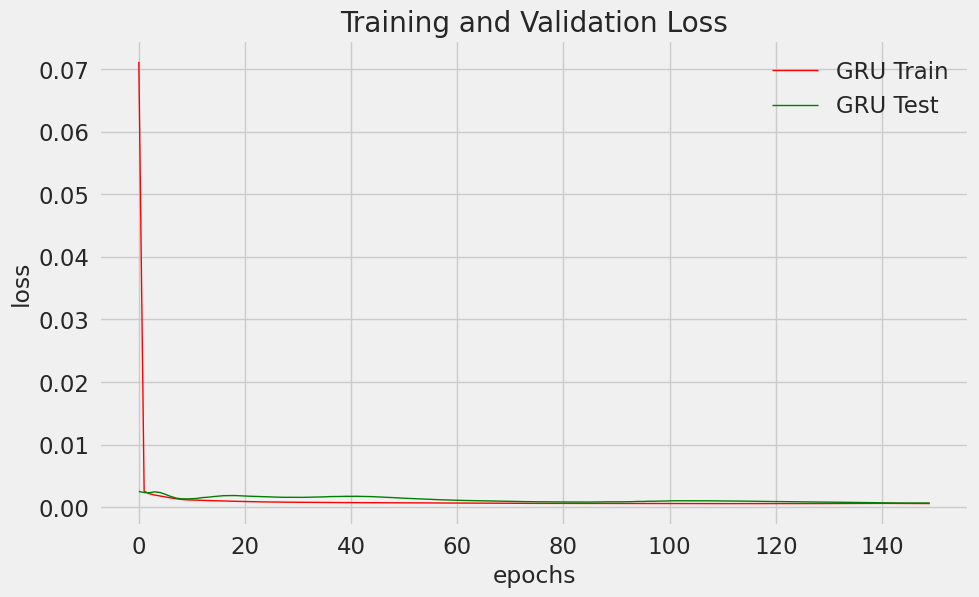

In [149]:
plt.figure(figsize=(10,6),dpi=100)
plt.plot(Model_GRU.history['loss'],label='GRU Train',color='red',linewidth=1)

plt.plot(Model_GRU.history['val_loss'],label='GRU Test',color='green', linewidth=1)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [150]:
### Lets Do the prediction and check performance metrics
train_predict_GRU=model_GRU.predict(X_train_GRU)
test_predict_GRU=model_GRU.predict(X_test_GRU)
train_predict_GRU.shape, test_predict_GRU.shape

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


((637, 1), (148, 1))

In [151]:
# Transform back to original form

train_predict_GRU = scaler.inverse_transform(train_predict_GRU)
test_predict_GRU = scaler.inverse_transform(test_predict_GRU)
original_ytrain_GRU = scaler.inverse_transform(y_train_GRU.reshape(-1,1))
original_ytest_GRU = scaler.inverse_transform(y_test_GRU.reshape(-1,1))

In [152]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain_GRU,train_predict_GRU)))
print("Train data MSE: ", mean_squared_error(original_ytrain_GRU,train_predict_GRU))
print("Train data MAE: ", mean_absolute_error(original_ytrain_GRU,train_predict_GRU))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest_GRU,test_predict_GRU)))
print("Test data MSE: ", mean_squared_error(original_ytest_GRU,test_predict_GRU))
print("Test data MAE: ", mean_absolute_error(original_ytest_GRU,test_predict_GRU))

Train data RMSE:  2.8079603582634562
Train data MSE:  7.884641373579037
Train data MAE:  2.2122984956851877
-------------------------------------------------------------------------------------
Test data RMSE:  3.2718792169078856
Test data MSE:  10.70519361003376
Test data MAE:  2.5537188227011187


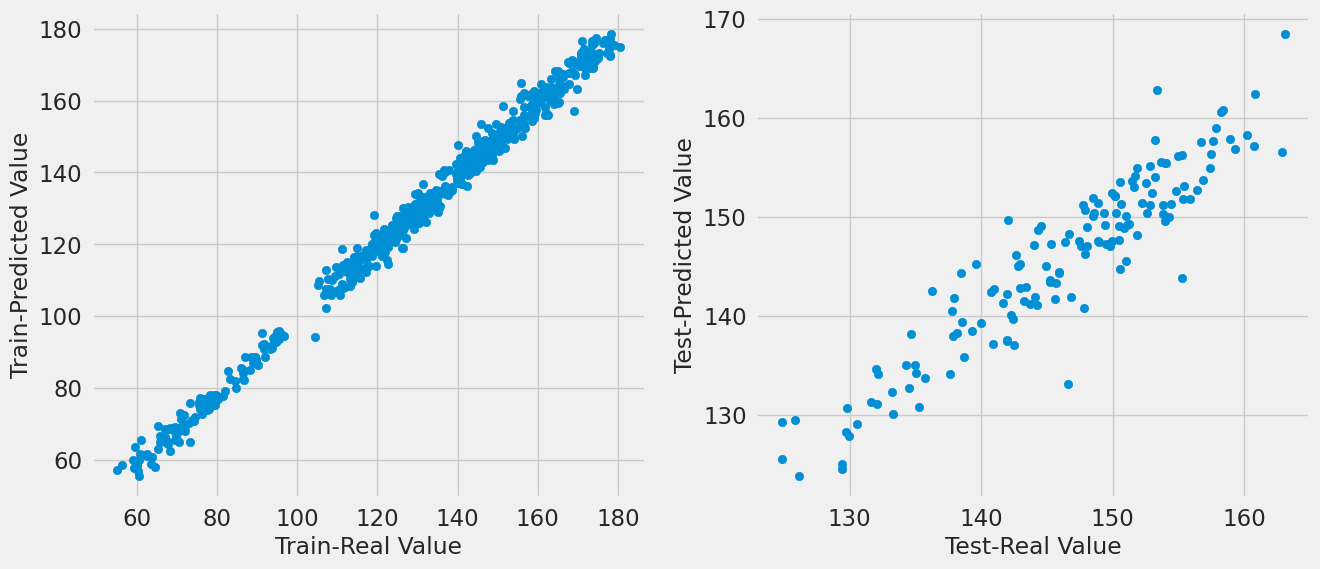

In [153]:
#Test and Train Scatter Plot
fig, ax = plt.subplots(1,2,figsize=(14,6))
ax[0].scatter(original_ytrain_GRU,train_predict_GRU)
ax[0].set_xlabel('Train-Real Value')
ax[0].set_ylabel('Train-Predicted Value');
#################################
ax[1].scatter(original_ytest_GRU,test_predict_GRU)
ax[1].set_xlabel('Test-Real Value')
ax[1].set_ylabel('Test-Predicted Value');

In [154]:
Apple_Data_AdjC_N_GRU
Apple_Data_AdjC_GRU

,Date,Adj Close
0,2020-01-02,73.449409
1,2020-01-03,72.735321
2,2020-01-06,73.314888
3,2020-01-07,72.970093
4,2020-01-08,74.143890
...,...,...
812,2023-03-24,160.250000
813,2023-03-27,158.279999
814,2023-03-28,157.649994
815,2023-03-29,160.770004


In [155]:
# shift train predictions for plotting
fig = plt.figure(figsize=(12,16))
look_back=time_step
trainPredictPlot_GRU = np.empty_like(Apple_Data_AdjC_N_GRU)
trainPredictPlot_GRU[:, :] = np.nan
trainPredictPlot_GRU[look_back:len(train_predict_GRU)+look_back, :] = train_predict_GRU
print("Train predicted data GRU: ", trainPredictPlot_GRU.shape)



Train predicted data GRU:  (817, 1)


<Figure size 1200x1600 with 0 Axes>

In [156]:
# shift test predictions for plotting
testPredictPlot_GRU = np.empty_like(Apple_Data_AdjC_N_GRU)
testPredictPlot_GRU[:, :] = np.nan
testPredictPlot_GRU[len(train_predict_GRU)+(look_back*2)+1:len(Apple_Data_AdjC_N_GRU)-1, :] = test_predict_GRU
print("Test predicted data GRU: ", testPredictPlot_GRU.shape)



Test predicted data GRU:  (817, 1)


In [157]:
names_GRU = cycle(['Original Adj Close Price',
                   'Train Predicted Adj Close Price',
                   'Test Predicted Adj Close Price'])

plotdf_GRU = pd.DataFrame({
    'date': Apple_Data_AdjC_GRU['Date'],
    'Original_Adj_Close': Apple_Data_AdjC_GRU['Adj Close'],
    'Train_Predicted_Adj_Close': trainPredictPlot_GRU.reshape(1,-1)[0].tolist(),
    'Test_Predicted_Adj_Close': testPredictPlot_GRU.reshape(1,-1)[0].tolist()
})

fig = px.line(
    plotdf_GRU,
    x=plotdf_GRU['date'],
    y=[
        plotdf_GRU['Original_Adj_Close'],
        plotdf_GRU['Train_Predicted_Adj_Close'],
        plotdf_GRU['Test_Predicted_Adj_Close']
    ],
    labels={'value': 'Stock price', 'date': 'Date'}
)

fig.update_layout(
    title_text='Comparision Between Original Adj Close Price vs Predicted Adj Close Price',
    font_size=12,
    font_color='black',
    legend_title_text='Adj Close Price',
    width=960,     # 10 inches
    height=576     # 6 inches
)

fig.for_each_trace(lambda t: t.update(name=next(names_GRU)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()


# Prediction

In [158]:
x_input_GRU=test_data_GRU[len(test_data_GRU)-time_step:].reshape(1,-1)
temp_input_GRU=list(x_input_GRU)
temp_input_GRU=temp_input_GRU[0].tolist()

from numpy import array

GRU_output=[]
n_steps=time_step
i=0
pred_days_GRU = 29
while(i<pred_days_GRU):

    if(len(temp_input_GRU)>time_step):

        x_input_GRU=np.array(temp_input_GRU[1:])
        #print("{} day input {}".format(i,x_input))
        x_input_GRU = x_input_GRU.reshape(1,-1)
        x_input_GRU = x_input_GRU.reshape((1, n_steps, 1))

        yhat = model_GRU.predict(x_input_GRU, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input_GRU.extend(yhat[0].tolist())
        temp_input_GRU=temp_input_GRU[1:]
        #print(temp_input)

        GRU_output.extend(yhat.tolist())
        i=i+1

    else:

        x_input_GRU = x_input_GRU.reshape((1, n_steps,1))
        yhat_GRU = model_GRU.predict(x_input_GRU, verbose=0)
        temp_input_GRU.extend(yhat_GRU[0].tolist())

        GRU_output.extend(yhat_GRU.tolist())
        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  29


In [159]:
last_days_GRU=np.arange(1,time_step+1)
day_pred_GRU=np.arange(time_step+1,time_step+pred_days_GRU+1)
print(last_days_GRU)
print(day_pred_GRU)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44]


In [161]:
temp_mat_GRU = np.empty((len(last_days_GRU)+pred_days_GRU+1,1))
temp_mat_GRU[:] = np.nan
temp_mat_GRU = temp_mat_GRU.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat_GRU
next_predicted_days_value_GRU = temp_mat_GRU
the_original_price = temp_mat_GRU

last_original_days_value[0:time_step+1] = (
    scaler.inverse_transform(
        Apple_Data_AdjC_N_GRU[len(Apple_Data_AdjC_N_GRU)-time_step:]
    ).reshape(1,-1).tolist()[0]
)

next_predicted_days_value_GRU[time_step+1:] = (
    scaler.inverse_transform(
        np.array(GRU_output).reshape(-1,1)
    ).reshape(1,-1).tolist()[0]
)

new_pred_plot_GRU = pd.DataFrame({
    'last_original_days_value': last_original_days_value,
    'next_predicted_days_value': next_predicted_days_value_GRU
})

names_GRU = cycle(['Last 15 days ', 'Predicted next 29 days'])

fig = px.line(
    new_pred_plot_GRU,
    x=new_pred_plot_GRU.index,
    y=['last_original_days_value', 'next_predicted_days_value'],
    labels={'value': 'Stock price', 'index': 'Timestamp'}
)

fig.update_layout(
    title_text='Compare last 15 days vs next 29 days',
    plot_bgcolor='white',
    font_size=15,
    font_color='black',
    legend_title_text='Adj Close',
    width=960,      # <--- FIGURE WIDTH
    height=576      # <--- FIGURE HEIGHT
)

fig.for_each_trace(lambda t: t.update(name=next(names_GRU)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)



separator_x = time_step + 1   # GRU prediction starts at index time_step+1

fig.add_vline(
    x=separator_x,
    line_width=2,
    line_dash="dash",
    line_color="black"
)



fig.add_annotation(
    x=separator_x + 4,
    y=max(new_pred_plot_GRU.max()),
    text="Predicted values",
    showarrow=False,
    font=dict(size=14, color="black")
)

fig.show()



In [162]:
GRU_DF = Apple_Data_AdjC_N_GRU.tolist()
GRU_DF.extend((np.array(GRU_output).reshape(-1,1)).tolist())
GRU_DF = scaler.inverse_transform(GRU_DF).reshape(1,-1).tolist()[0]

names = cycle(['Adj Close'])

fig = px.line(
    GRU_DF,
    labels={'value': 'Stock price', 'index': 'Timestamp'}
)

fig.update_layout(
    title_text='Plotting whole Adj Close stock price with prediction (GRU Model)',
    plot_bgcolor='white',
    font_size=15,
    font_color='black',
    legend_title_text='Stock',
    width=960,     # 10 inches
    height=576     # 6 inches
)

fig.for_each_trace(lambda t: t.update(name=next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()


## Real Data

In [163]:
Apple_Data_M=pd.read_csv('All_Data.csv', header=0, index_col=0, parse_dates=True)

In [164]:
# Reset Index
Apple_Data_M.reset_index(inplace=True)
Apple_Data_M

,Date,Open,High,Low,Close,Adj Close,Volume
0,02/01/2020,74.059998,75.150002,73.797501,75.087502,73.449394,135480400
1,03/01/2020,74.287498,75.144997,74.125000,74.357498,72.735321,146322800
2,06/01/2020,73.447502,74.989998,73.187500,74.949997,73.314880,118387200
3,07/01/2020,74.959999,75.224998,74.370003,74.597504,72.970085,108872000
4,08/01/2020,74.290001,76.110001,74.290001,75.797501,74.143898,132079200
...,...,...,...,...,...,...,...
841,05/05/2023,170.979996,174.300003,170.759995,173.570007,173.570007,113316400
842,08/05/2023,172.479996,173.850006,172.110001,173.500000,173.500000,55962800
843,09/05/2023,173.050003,173.539993,171.600006,171.770004,171.770004,45326900
844,10/05/2023,173.020004,174.029999,171.899994,173.559998,173.559998,53724500


In [165]:
Apple_Data_AdjC_RealData=Apple_Data_M[['Date','Adj Close']]
Apple_Data_AdjC_RealData1=Apple_Data_AdjC_RealData[['Adj Close']]

In [166]:
Apple_Data_AdjC_RealData1

,Adj Close
0,73.449394
1,72.735321
2,73.314880
3,72.970085
4,74.143898
...,...
841,173.570007
842,173.500000
843,171.770004
844,173.559998


In [167]:
Apple_Data_AdjC_RealData1_A=Apple_Data_AdjC_RealData1.to_numpy()

In [168]:
RealData1_DF1 = [item[0] for item in Apple_Data_AdjC_RealData1_A]

### To Make Comparison ML & DL Models with Real Data

In [181]:
finaldf = pd.DataFrame({
    'SVR':SVR_DF,
    'RF':RF_DF,
    'XGB':XGB_DF,
    'RNN':RNN_DF,
    'LSTM':LSTM_DF,
    'GRU': GRU_DF,
    'RealData':RealData1_DF1
})
finaldf.tail(30)

  #  'RF':RF_DF,
  #  'XGB':XGB_DF,


,SVR,RF,XGB,RNN,LSTM,GRU,RealData
816,162.360001,[162.360001],[162.360001],162.360001,162.360001,162.360001,162.360001
817,162.031286,[160.847666823],[160.94061279296875],160.876152,161.584704,161.627465,164.899994
818,161.461707,[160.54095502099983],[161.22744750976562],159.542323,160.851925,160.828507,166.169998
819,162.090194,[161.31388096700016],[163.2470703125],159.142874,160.604717,161.211640,165.630005
820,161.807057,[160.99940920600028],[164.355224609375],158.239569,160.315489,160.983969,163.759995
821,161.302727,[160.11015561200009],[166.56158447265625],156.958194,159.865915,160.161383,164.660004
822,161.856621,[160.3927543830002],[170.0564727783203],156.111606,159.423570,160.051050,162.029999
823,161.703354,[160.92447555200025],[172.82225036621094],155.109976,158.999601,159.864484,160.800003
824,160.864331,[160.4303298560002],[173.0576934814453],153.769614,158.580705,159.342663,160.100006
825,160.370609,[160.314084065],[172.0476837158203],152.824559,158.179750,158.967216,165.559998


In [182]:
for col in finaldf.columns:
    finaldf[col] = finaldf[col].apply(lambda x: x[0] if isinstance(x, (list, np.ndarray)) else x)


In [183]:
plot_df = finaldf.iloc[750:].copy()

# Ensure all columns are numeric
plot_df = plot_df.apply(pd.to_numeric, errors='coerce')


In [185]:

names = cycle(['SVR','RF','XGB','RNN','LSTM','GRU','RealData'])

fig = px.line(
    plot_df,
    x=plot_df.index,
    y=plot_df.columns,
    labels={'value': 'Stock price', 'index': 'Timestamp'}
)

# Rename traces
fig.for_each_trace(lambda t: t.update(name=next(names)))

# 🔹 Make RealData black dashed
fig.for_each_trace(
    lambda t: t.update(
        line=dict(color='black', dash='dash', width=3)
    ) if t.name == 'RealData' else None
)

fig.update_layout(
    title_text='Model Comparison',
    plot_bgcolor='white',
    font_size=15,
    font_color='black',
    legend_title_text='Models',
    width=960,
    height=576
)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()



## GARCH Analysis

In [186]:
from datetime import datetime, timedelta

In [187]:
Apple_Data_M=pd.read_csv('AAPL_2020_2023_3.csv', header=0, index_col=0, parse_dates=True)
Apple_Data_M

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.449409,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.735321,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.314888,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.970093,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.143890,132079200
...,...,...,...,...,...,...
2023-03-24,158.860001,160.339996,157.850006,160.250000,160.250000,59196500
2023-03-27,159.940002,160.770004,157.869995,158.279999,158.279999,52390300
2023-03-28,157.970001,158.490005,155.979996,157.649994,157.649994,45992200


In [188]:
Returns = Apple_Data_M
Returns = 100 * Apple_Data_M['Adj Close'].pct_change().dropna()
#adfuller_test(Returns)
#kpss_test(Returns)

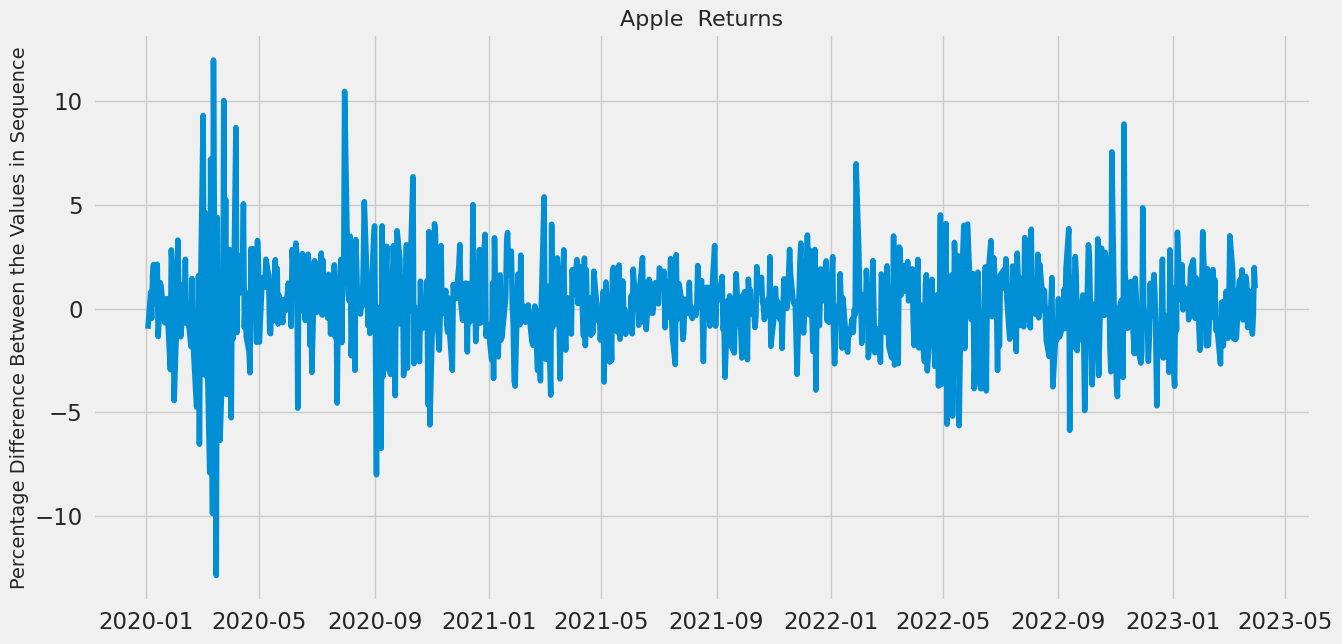

In [189]:
plt.figure(figsize=(14,7))
plt.plot(Returns)
plt.ylabel('Percentage Difference Between the Values in Sequence', fontsize=14)
plt.title('Apple  Returns', fontsize=16);

In [192]:
# Grid search for different GARCH models - As before try different options for mean
test_size = 200
AIC = np.zeros((25,3))
idx = 0
for var_p in range(1,6,1):
  for var_q in range(1,6,1):
    model = arch_model(Returns[:-test_size], mean = 'constant', vol = 'GARCH', dist = 'normal', rescale = 'FALSE', p = var_p, q = var_q)
    model_fit = model.fit(disp=False)
    AIC[idx,0] = var_p
    AIC[idx,1] = var_q
    AIC[idx,2] = model_fit.aic
    idx += 1

order_df = pd.DataFrame(AIC, columns=['p', 'q', 'AIC'])
display(order_df)

# Best combination leading to the lowest AICc
opt = order_df[order_df['AIC']==order_df['AIC'].min()]
display(opt)
p_opt = opt['p']
q_opt = opt['q']

,p,q,AIC
0,1.0,1.0,2647.945400
1,1.0,2.0,2649.945400
2,1.0,3.0,2651.945400
3,1.0,4.0,2653.945400
4,1.0,5.0,2655.945400
5,2.0,1.0,2644.829743
6,2.0,2.0,2645.472872
7,2.0,3.0,2647.472872
8,2.0,4.0,2649.472872
9,2.0,5.0,2651.472872


,p,q,AIC
5,2.0,1.0,2644.829743


Iteration:      1,   Func. Count:      7,   Neg. LLF: 17902203526.268803
Iteration:      2,   Func. Count:     15,   Neg. LLF: 132020.79172722145
Iteration:      3,   Func. Count:     23,   Neg. LLF: 1331.6798496450206
Iteration:      4,   Func. Count:     30,   Neg. LLF: 1326.7533328265108
Iteration:      5,   Func. Count:     37,   Neg. LLF: 59011.371961653065
Iteration:      6,   Func. Count:     44,   Neg. LLF: 1330.872928331808
Iteration:      7,   Func. Count:     51,   Neg. LLF: 1318.7827529957472
Iteration:      8,   Func. Count:     58,   Neg. LLF: 1330.9697731377403
Iteration:      9,   Func. Count:     65,   Neg. LLF: 1317.576017464466
Iteration:     10,   Func. Count:     72,   Neg. LLF: 1319.766193211023
Iteration:     11,   Func. Count:     79,   Neg. LLF: 1317.4154701306584
Iteration:     12,   Func. Count:     85,   Neg. LLF: 1317.4148741047718
Iteration:     13,   Func. Count:     91,   Neg. LLF: 1317.4148716565915
Iteration:     14,   Func. Count:     96,   Neg. LLF: 

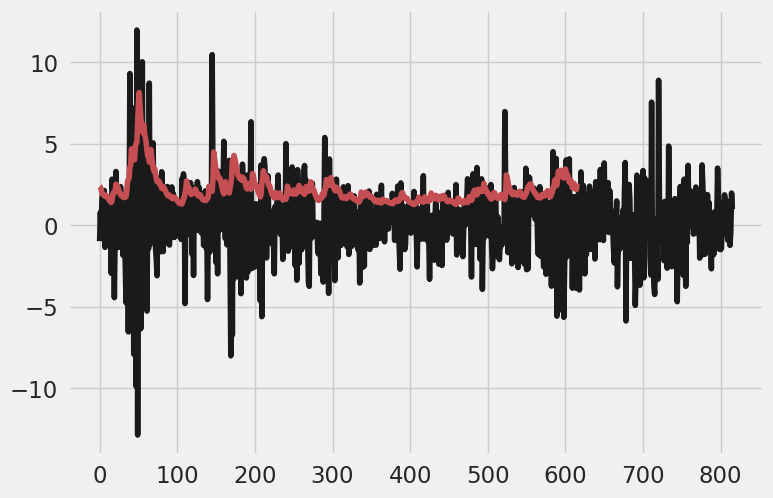

In [193]:
model = arch_model(Returns[:-test_size], mean = 'constant', vol = 'GARCH', dist = 'normal', rescale = 'FALSE', p =2, q=1)
model_fit = model.fit()
print(model_fit.summary)

plt.plot(Returns.values,'-k')
plt.plot(model_fit.conditional_volatility.values,'-r')

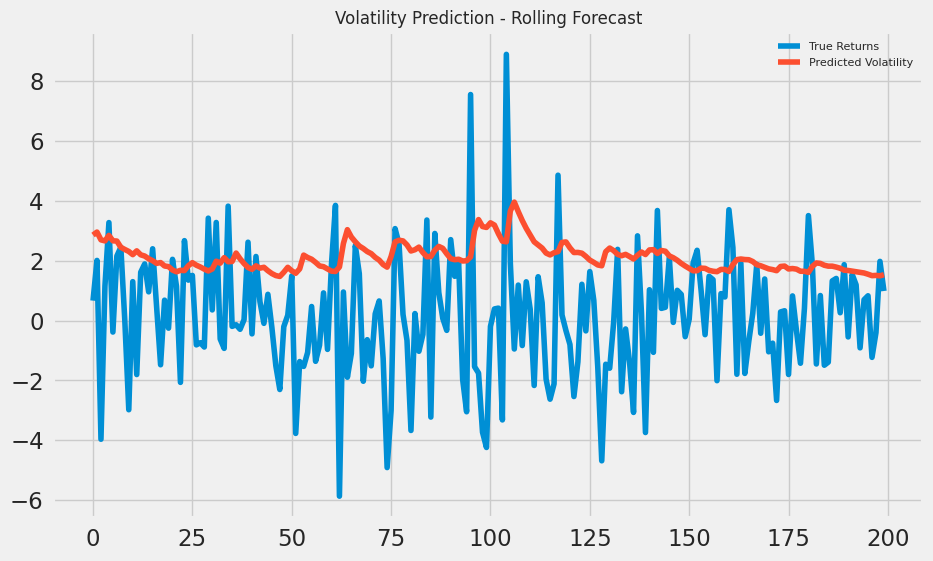

In [194]:
rolling_predictions = []

for i in range(test_size):
    train = Returns[:-(test_size-i)]
    model = arch_model(train, mean = 'constant', vol = 'GARCH', dist = 'normal', rescale = 'FALSE', p = 2, q = 1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

plt.figure(figsize=(10,6))
plt.plot(Returns[-test_size:].values)
plt.plot(rolling_predictions);
plt.title('Volatility Prediction - Rolling Forecast', fontsize=12)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=8)

## Volatility Prediction

In [195]:
train1 = Returns
model = arch_model(train1, p=2, q=1)
model_fit = model.fit(disp='off')

In [196]:
pred = model_fit.forecast(horizon=29)
future_dates = [Returns.index[-1] + timedelta(days=i) for i in range(1,30)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

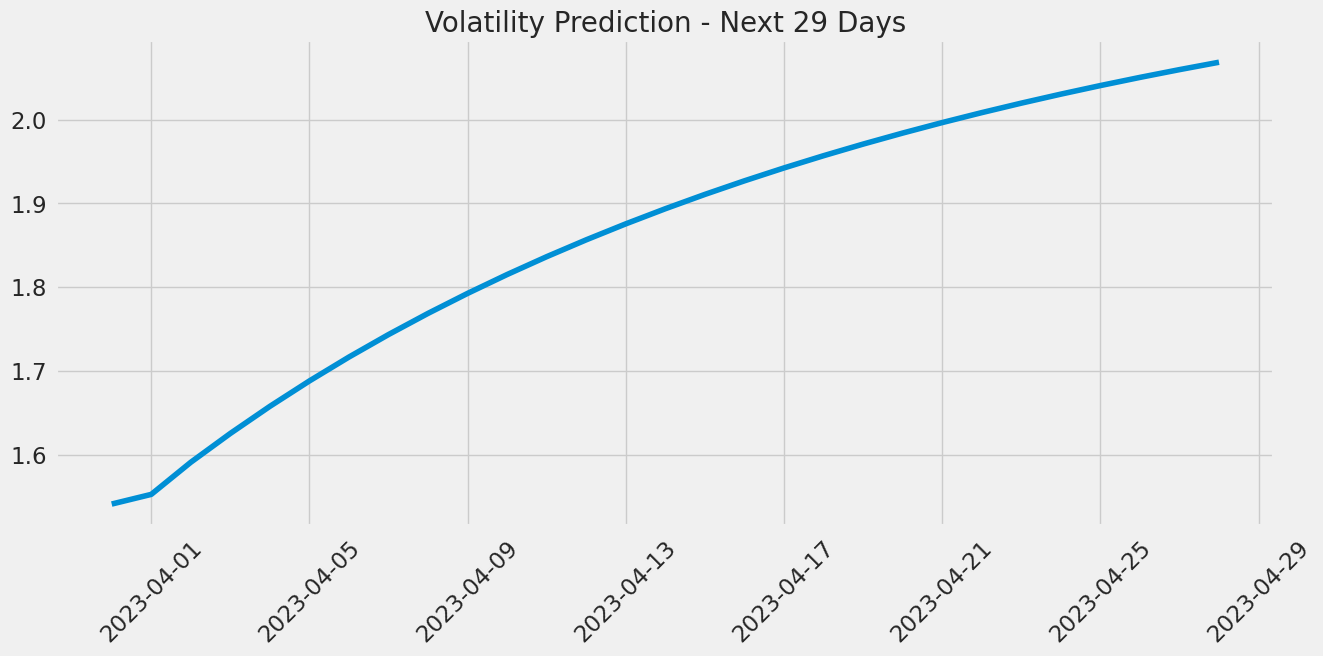

In [197]:
plt.figure(figsize=(14,6))
#plt.plot(Returns2)
plt.plot(pred)

plt.title('Volatility Prediction - Next 29 Days', fontsize=20)
plt.xticks(rotation=45);

In [198]:
Apple_Volatile=pd.DataFrame({

    'Date': [
'2023-04-03', '2023-04-04', '2023-04-05', '2023-04-06', '2023-04-07', '2023-04-08', '2023-04-09',
'2023-04-10', '2023-04-11', '2023-04-12', '2023-04-13', '2023-04-14', '2023-04-15', '2023-04-16',
'2023-04-17', '2023-04-18', '2023-04-19', '2023-04-20', '2023-04-21', '2023-04-22', '2023-04-23',
'2023-04-24', '2023-04-25', '2023-04-26', '2023-04-27', '2023-04-28', '2023-04-29', '2023-04-30'
],

    'Adj_Close':[164.270004, 166.600006, 164.740005, 162.429993, 161.419998, 162.350006, 161.220001, 161.630005,
                 164.589996, 165.089996, 166.100006, 165.800003, 166.089996, 165.050003, 165, 165.190002,
                 163.059998, 165.190002, 168.490005, 169.279999, 170.089996, 169.5, 164.889999, 170.979996,
                 172.479996, 173.050003, 173.020004, 173.850006]
})
# Convert the dates to datetime type
#dates = pd.to_datetime(dates)


In [199]:
Apple_Volatile.set_index('Date',inplace=True)

In [200]:
Returns2 = Apple_Volatile
Returns2 = 100 * Apple_Volatile['Adj_Close'].pct_change().dropna()

## Real Value Volatility and Predicted Volatility

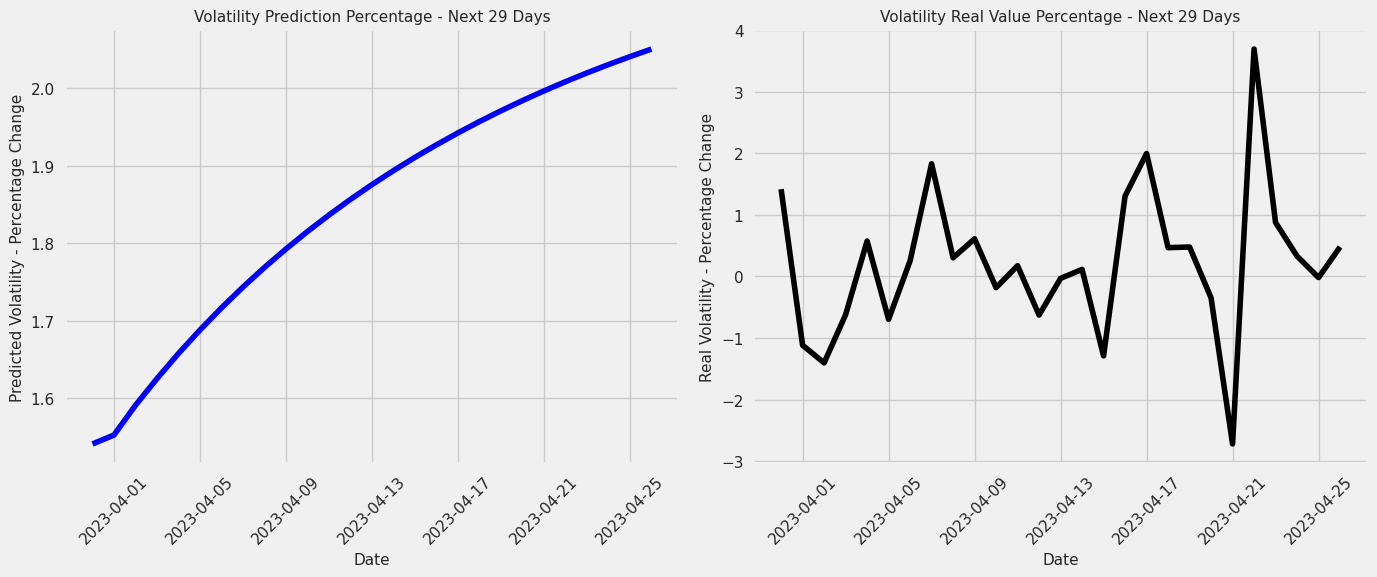

In [201]:

# --- Ensure both series have the same length ---
min_len = min(len(pred), len(Returns2))

pred_aligned = pred[:min_len]
returns_aligned = Returns2[:min_len]

x_axis = pred_aligned.index   # shared x-axis

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# --- Left plot (Predicted) ---
ax[0].plot(x_axis, pred_aligned.values, color='blue')
ax[0].set_xlabel('Date', fontsize=11)
ax[0].set_ylabel('Predicted Volatility - Percentage Change', fontsize=11)
ax[0].set_title('Volatility Prediction Percentage - Next 29 Days', fontsize=11)
ax[0].tick_params(axis='x', rotation=45, labelsize=11)   # <-- updated
ax[0].tick_params(axis='y', labelsize=11)

# --- Right plot (Real) ---
ax[1].plot(x_axis, returns_aligned.values, color='black')
ax[1].set_xlabel('Date', fontsize=11)
ax[1].set_ylabel('Real Volatility - Percentage Change', fontsize=11)
ax[1].set_title('Volatility Real Value Percentage - Next 29 Days', fontsize=11)
ax[1].tick_params(axis='x', rotation=45, labelsize=11)   # <-- updated
ax[1].tick_params(axis='y', labelsize=11)

plt.tight_layout()
plt.show()

